# Пункт 1. Импорт библиотек

###  1.1 Базовые модули

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import skew, norm

### 1.2 Set style

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 14})

### 1.3 Warnings

In [3]:
import warnings
warnings.filterwarnings(action = 'ignore')

### 1.4 Модули preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 1.5 Метрики для регрессии

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 1.6 Decomposition

In [6]:
from sklearn.decomposition import PCA

### 1.7 Ensemble Methods

In [7]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

### 1.8 Feature selection

In [8]:
from sklearn.feature_selection import SelectKBest, chi2

### 1.9 Linear regressor

In [9]:
from sklearn.linear_model import LinearRegression

### 1.10 Model selection

In [10]:
from sklearn.model_selection import GridSearchCV, KFold, TimeSeriesSplit, train_test_split

### 1.11 Support Vector Machines

In [11]:
from sklearn.svm import LinearSVR

# Пункт 2. Загрузка данных и просмотр

In [12]:
train_data = pd.read_csv("/home/nikitaneural/Kaggle/Sales/train.csv")
test_data = pd.read_csv("/home/nikitaneural/Kaggle/Sales/test.csv")

### 2.1 Данные

In [13]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### 2.2 Корреляция

In [15]:
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Text(0.5, 0, 'Correlation with Salesprice')

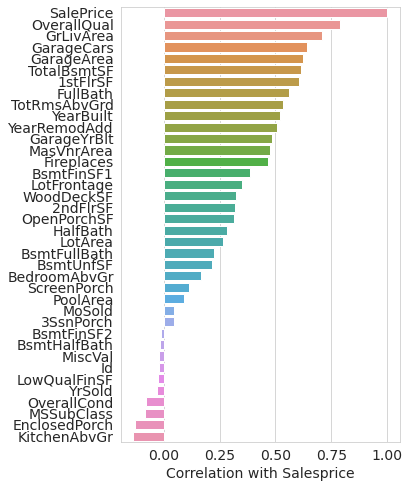

In [16]:
corr_df = train_data.corr()['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(5,8))
sns.barplot(y=corr_df.index, x=corr_df)
plt.xlabel("Correlation with Salesprice")

* отсюда видно что Overall quality(общее качество), Living area(жилая площадь), Garage area(Площадь гаража) и basement area(подвал) имеют наилучшию корреляцию

### 2.3 Отношение между жилой площадью и ценой

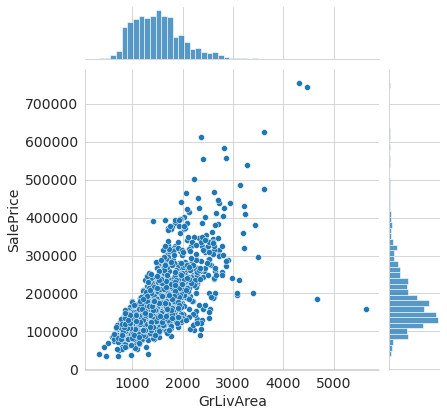

In [17]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=train_data)

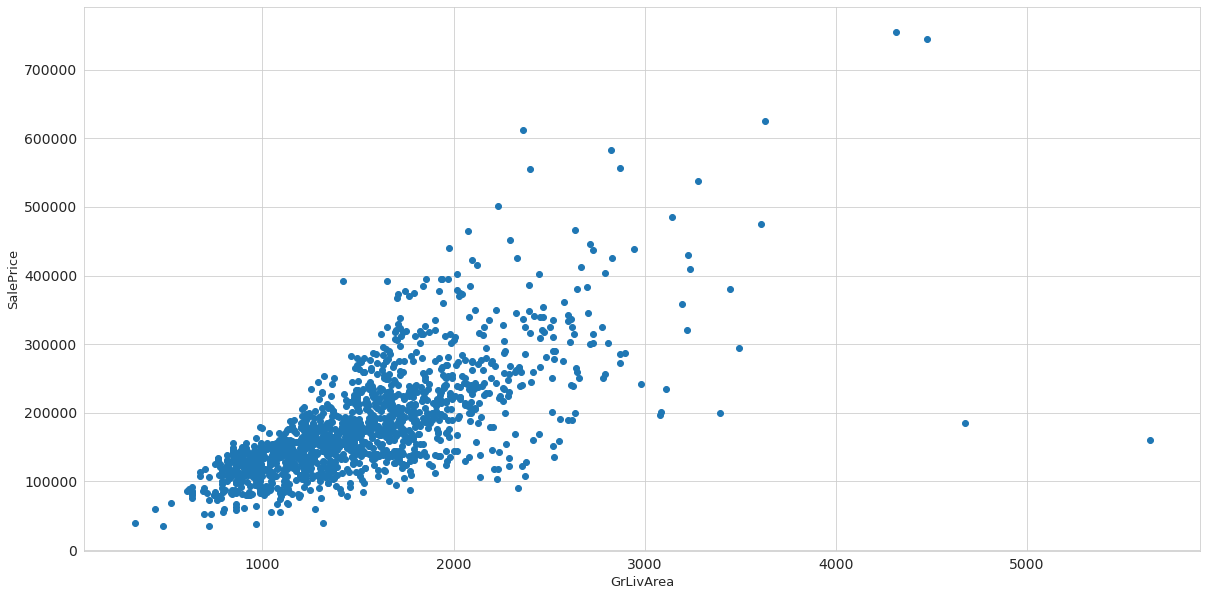

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

* Видны два выброса, которые имеют большую жилую площадь, но маленькую цену

### 2.4 Удаляем два выброса

In [19]:
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)

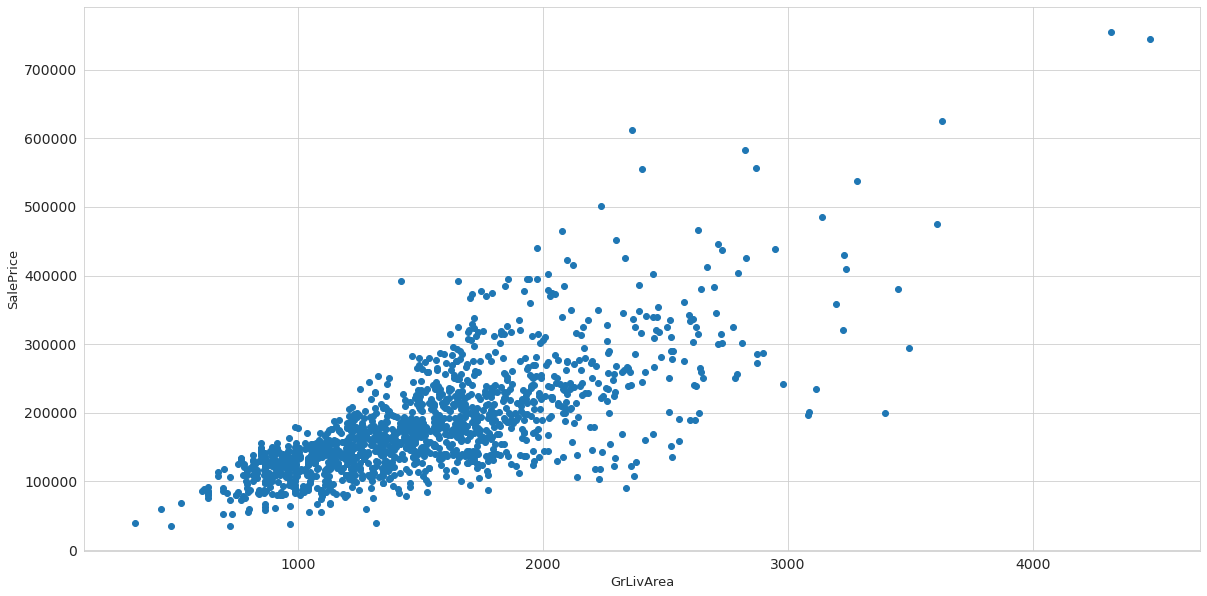

In [20]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### 2.5 Информация о данных

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1199 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

# Пункт 3. Описание фичей

* MSSubClass - определяет тип жилья, участвующего в продаже
* MSZoning - определяет общую классификацию продажи. 
* LotFrontage - Линейные ноги улицы, соединенной с земельным участком
* LotArea - Размер участка в квадратных футах
* Street - Тип подъезда к собственности
* Alley - Тип подъездной аллеи к собственности
* LotShape - Общая форма собственности
* LandContour - Ровность собственности
* Utilities - Тип имеющихся утилит
* LotConfig - Конфигурация участка
* LandSlope - склон участка
* Neighborhood- Физические места в пределах города Эймс
* Condition1 - Близость к различным условиям
* Condittion2 - близость к различным условиям (если присутствует более одного)
* BldgType - Тип жилья
* HouseStyle - Стиль жилища
* OverallQual - оценивает общий материал и отделку дома
* OvarallCond - Оценивает общее состояние дома.
* YearBuilt - Дата постройки
* YearRemodAdd - дата реконструкции (как и дата строительства, если не выполнялась реконструкция или дополнения)
* RoofStyle - Тип крыши
* RoofMatl - Материал крыши
* Exterior1st - Наружное покрытие дома
* Exterior2nd - Наружное покрытие дома (если используется более одного материала)
* MasVnrType - Тип облицовки кладки
* MasVnrArea - Площадь облицовки каменной кладкой в квадратных футах
* ExterQual - Оценивает качество материала снаружи
* ExterCond - оценивает текущее состояние материала снаружи
* Foundation - Тип фундамента
* BsmtQual - оценивает высоту подвала
* BsmtCond - Оценивает общее состояние подвала
* BsmtExposure - Относится к стенам на уровне пешеходных переходов или сада
* BsmtFinType1 - Оценка готовой площади подвала
* BsmtFinSF1 - квадратные футы с отделкой типа 1
* BsmtFinType2 - Оценка готовой площади подвала (если несколько типов)
* BsmtFinSF2 - Готовые квадратные футы типа 2
* BsmtUnfSF - Незавершенные квадратные футы подвала
* TotalBsmtSF - Общая площадь подвала в квадратных футах 
* Heating - Тип отопления
* HeatingQC - Качество и состояние отопления
* CentralAir - Центральное кондиционирование
* Electrical - электрическая система 
* 1stFlrSF - квадратные футы на первом этаже
* 2ndFlrSF - Площадь второго этажа в квадратных футах
* LowQualFinSF - квадратные футы с отделкой низкого качества (все этажи)
* GrLivArea - квадратные футы жилой площади надземного уровня
* BsmtFullBath - Полные ванные комнаты в подвале 
* BsmtHalfBath - полуподвальные ванные комнаты
* FullBath - Полные ванные комнаты выше уровня
* HalfBath - Полуванны выше уровня
* Спальня - спальни выше уровня (НЕ включают спальни в подвале)
* Kitchen - Кухни высшего качества 
* KitchenQual - Качество кухни
* TotRmsAbvGrd - Общее количество комнат выше уровня (без ванных комнат)
* Functional - домашняя функциональность (предположим, что типичный, если вычеты не требуются) 
* Fireplaces - Количество каминов 
* FireplaceQu - качество камина
* GarageType: расположение гаража
* GarageYrBlt - Год постройки гаража
* GarageFinish - Внутренняя отделка гаража
* GarageCars - Размер гаража по вместимости машины 
* GarageArea - Размер гаража в квадратных футах
* GarageQual - качество гаража
* GarageCond - Состояние гаража
* PavedDrive - асфальтированная подъездная дорога
* WoodDeckSF - Площадь деревянной террасы в квадратных футах 
* OpenPorchSF - Площадь открытой веранды в квадратных футах
* EnclosedPorch - площадь закрытого крыльца в квадратных футах 
* 3SsnPorch - Площадь крыльца на три сезона в квадратных футах
* PoolArea - Площадь бассейна в квадратных футах
* PoolQC - качество бассейна 
* Fence - качество забора 
* MiscFeature: прочие функции, не включенные в другие категории
* MiscVal - значение дополнительных характеристик
* MoSold - месяц продажи
* YrSold - Год продажи
* SaleType - Тип продажи
* SaleCondition - Состояние продажи

### 3.1 Разделение фич на типы

### 3.1.1 Детали участка

In [22]:
df_plot = train_data[['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley', 'LotShape','LandContour',
                      'LotConfig','LandSlope','SalePrice']]

In [23]:
df_plot.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,250000


###### Количество пропущенных

In [24]:
df_plot.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1367
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
SalePrice         0
dtype: int64

###### Посмотрим на категориальные данные

In [25]:
cat = df_plot.select_dtypes(include=["object"]).columns
cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope'],
      dtype='object')

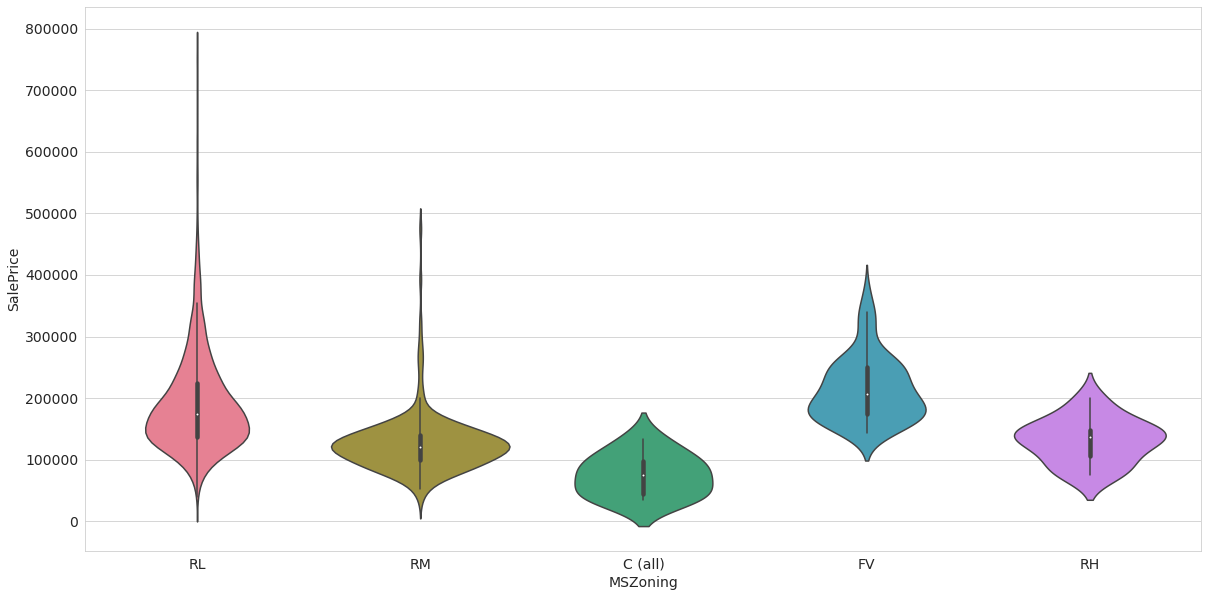

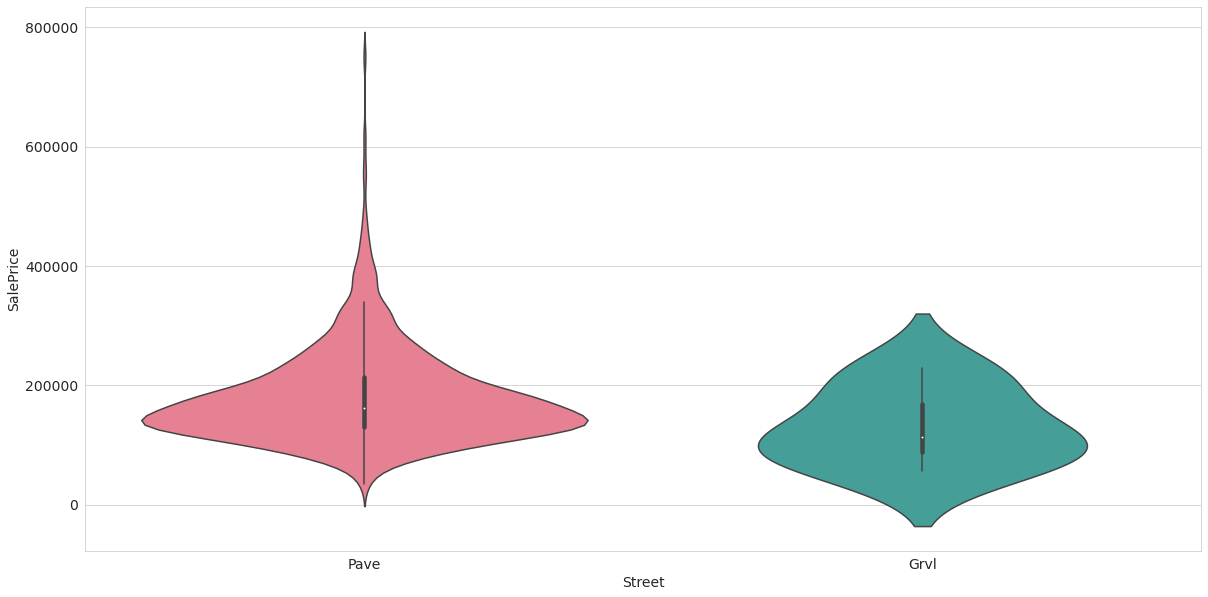

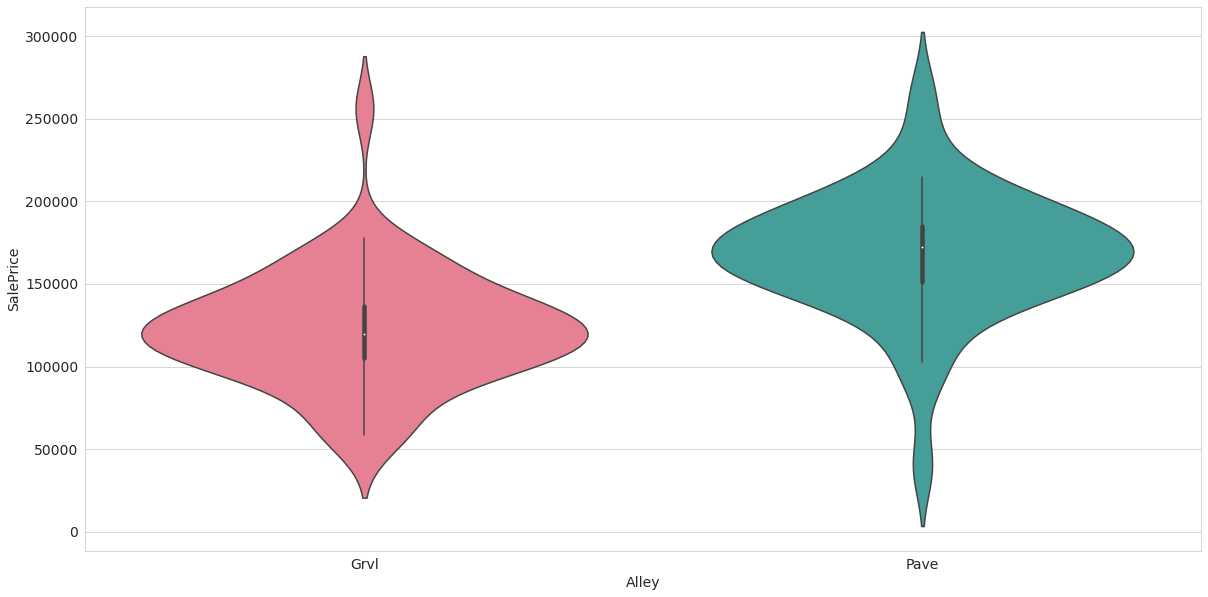

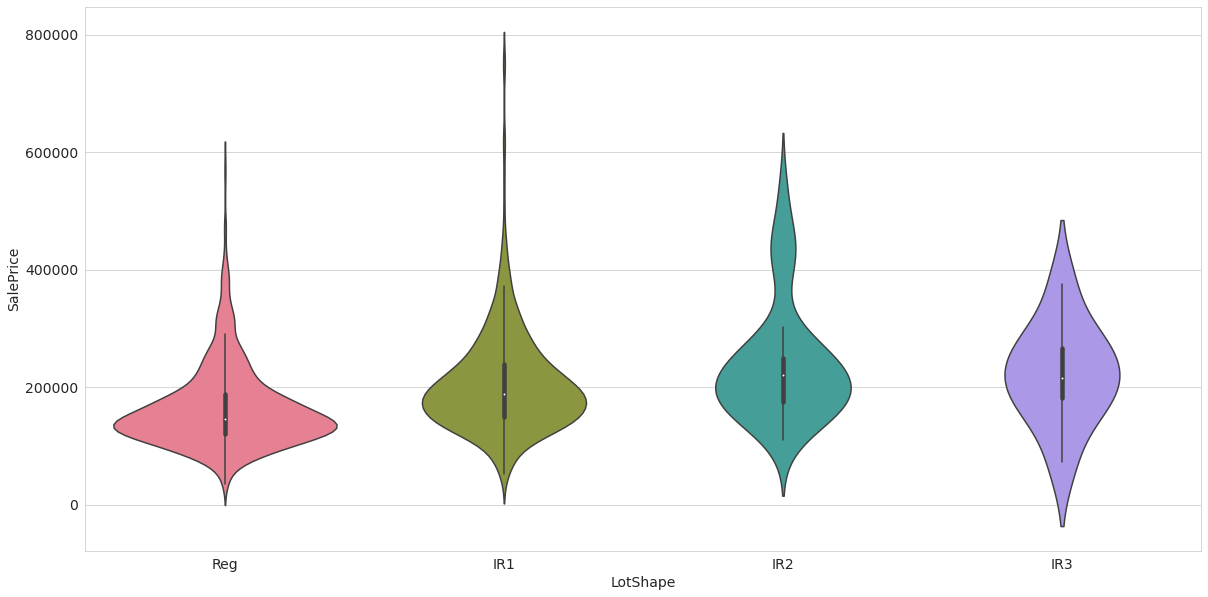

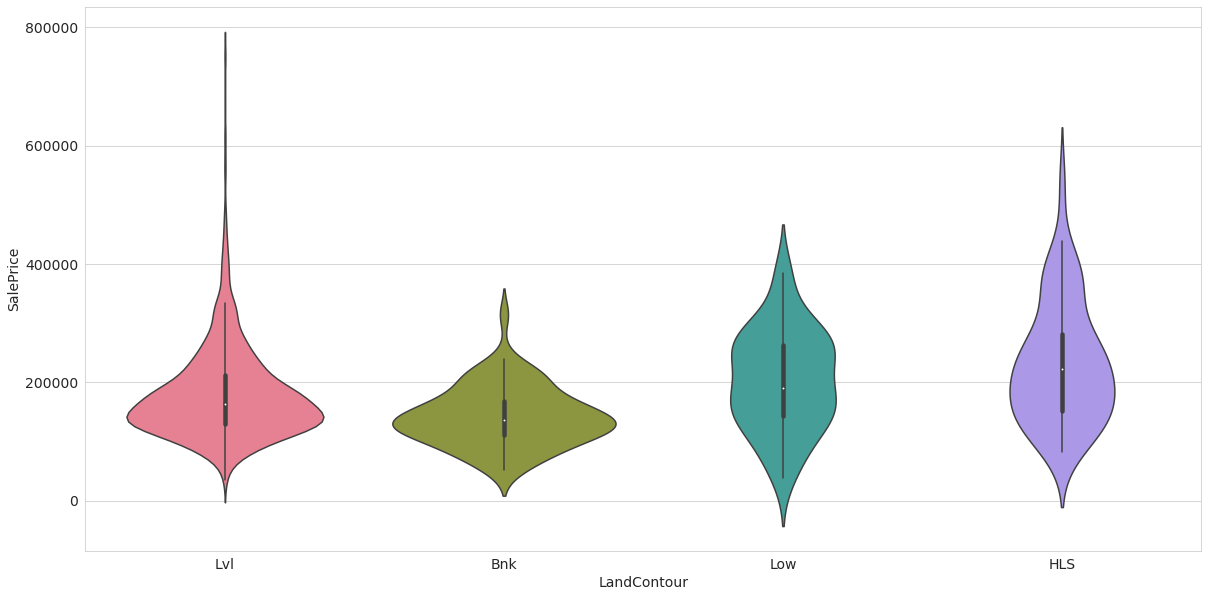

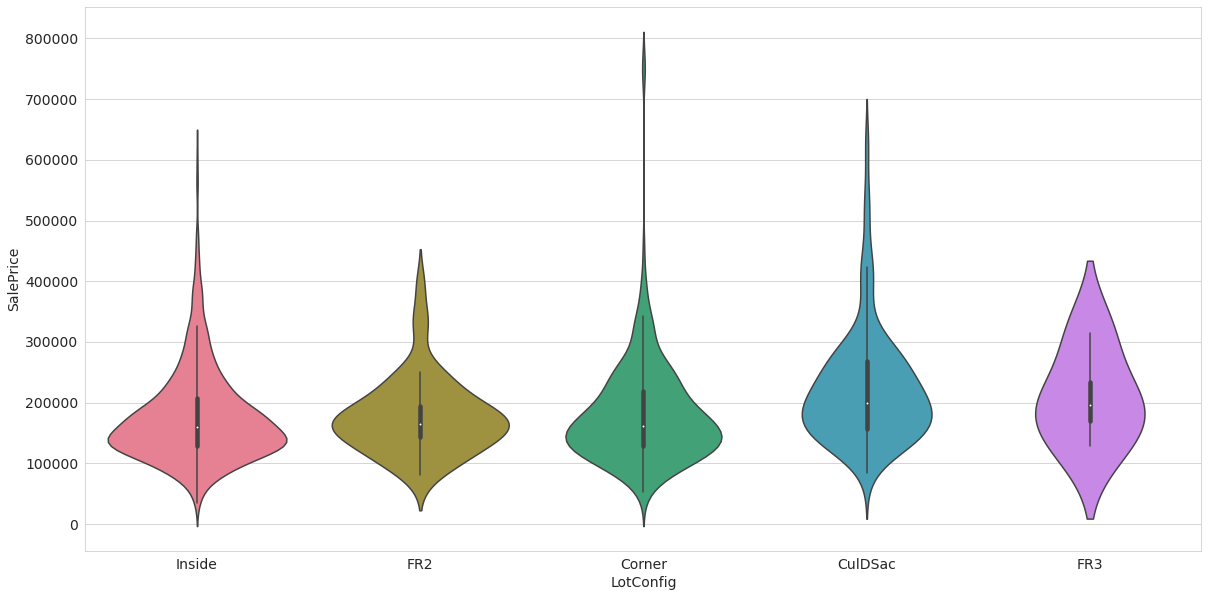

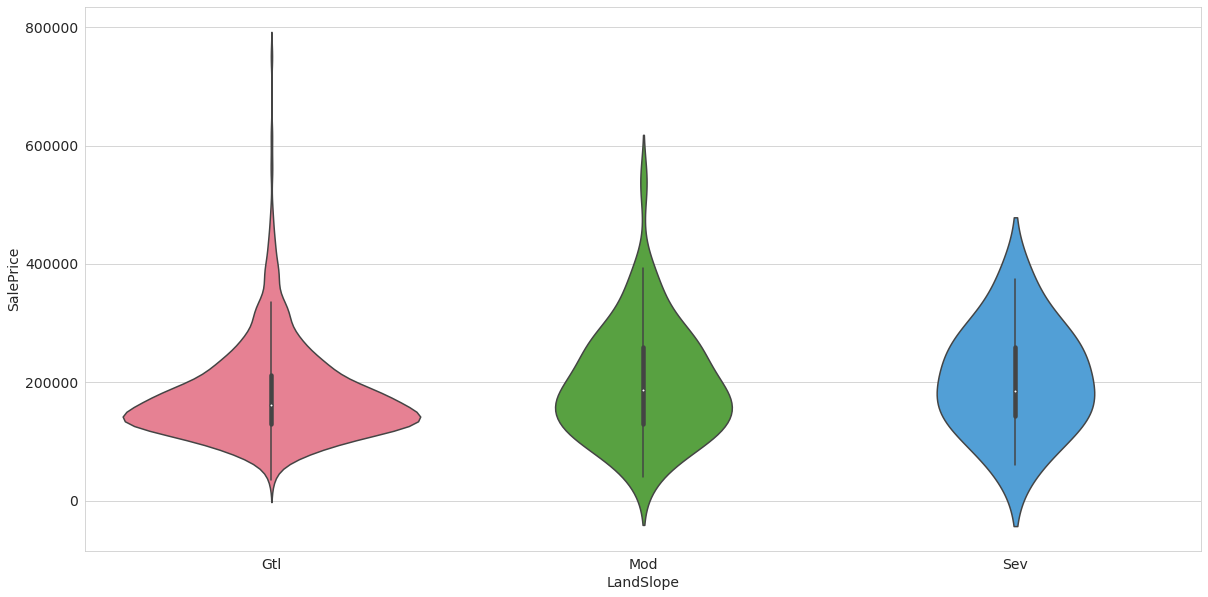

In [26]:
for col in cat:
    fig, axes = plt.subplots(figsize=(20, 10))
    sns.violinplot(data=df_plot, x=col, y='SalePrice', palette ='husl')

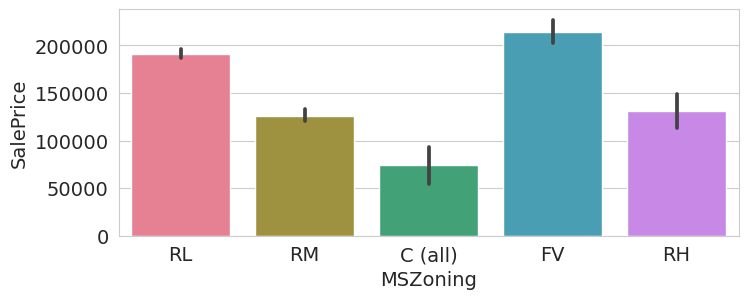

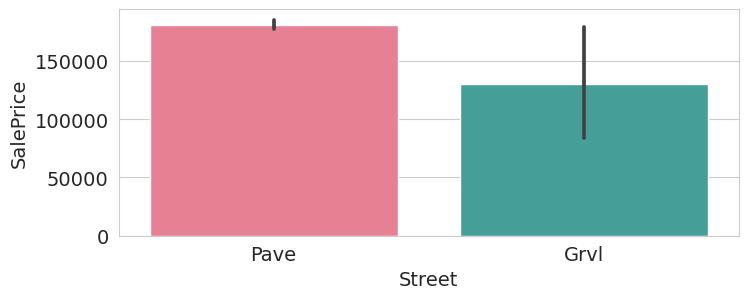

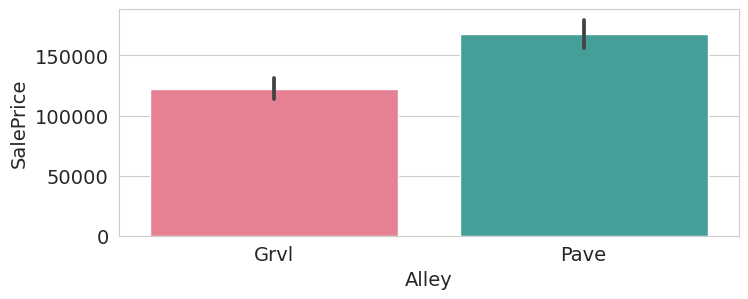

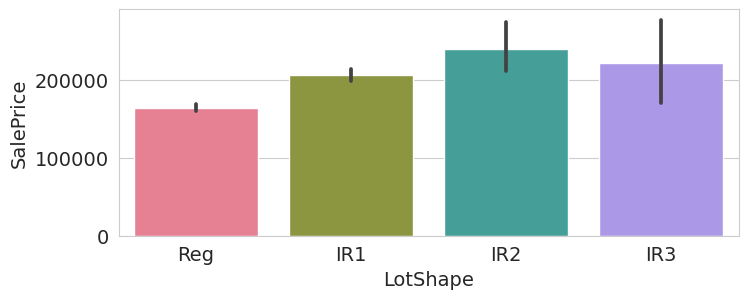

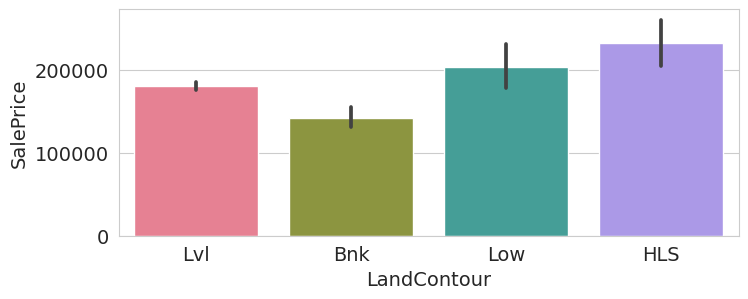

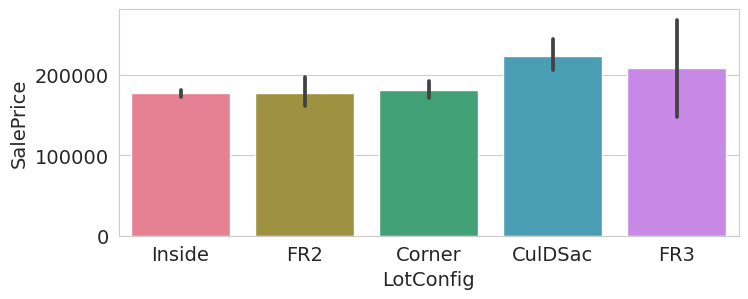

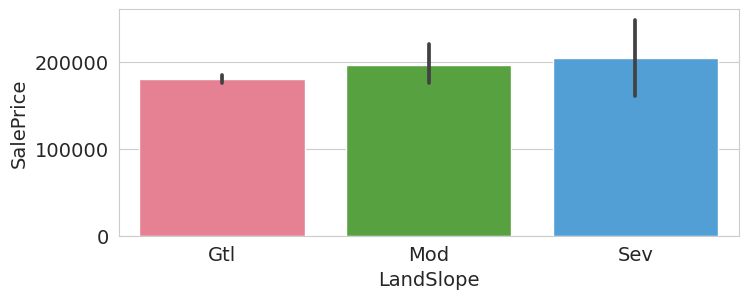

In [27]:
for col in cat:
    fig, axes = plt.subplots(figsize=(8,3), dpi=100)
    sns.barplot(data=df_plot, x=col, y='SalePrice', palette ='husl')

<AxesSubplot:>

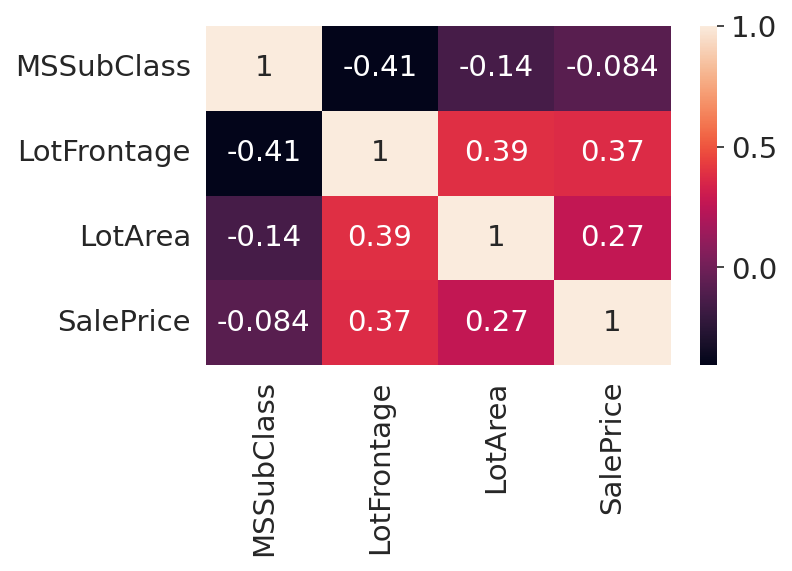

In [28]:
plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(df_plot.corr(), annot=True)

In [29]:
train_data.drop('LotConfig', axis=1, inplace=True)
train_data.drop('Alley', axis=1, inplace=True)
test_data.drop('LotConfig', axis=1, inplace=True)
test_data.drop('Alley', axis=1, inplace=True)

##### Как видно из корреляционной матрицы LotArea и LotFrontage имеют неплохую корреляцию с SalePrice

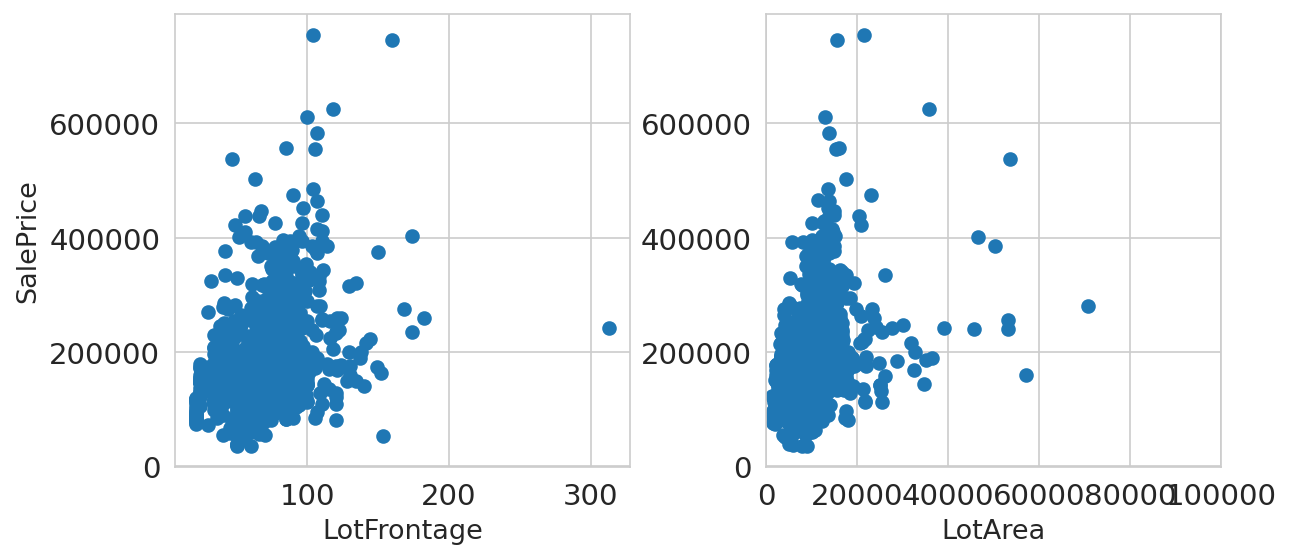

In [30]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(9,4), dpi=150)
ax[0].scatter(x = df_plot['LotFrontage'], y = train_data['SalePrice'])
ax[1].scatter(x = df_plot['LotArea'], y = train_data['SalePrice'])
ax[1].set_xlim(0, 100000)
ax[0].set_ylabel('SalePrice', fontsize=13)
ax[0].set_xlabel('LotFrontage', fontsize=13)
ax[1].set_xlabel('LotArea', fontsize=13)
fig.subplots_adjust(wspace=0.3)
plt.show()

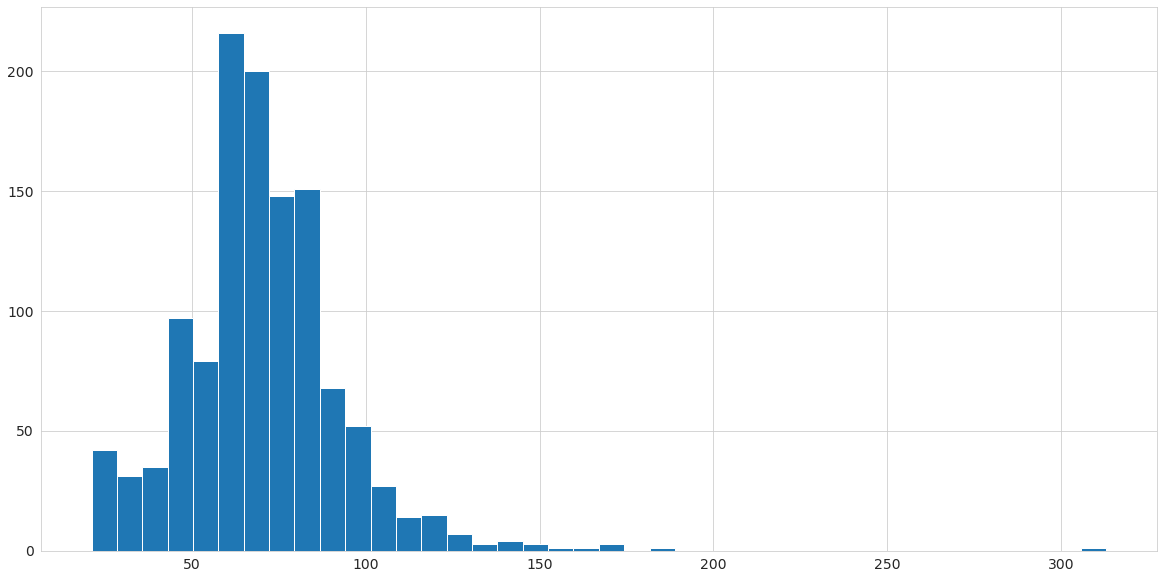

In [31]:
plt.hist(train_data["LotFrontage"].values, bins=40)
plt.show()

##### В LotFrontage 259 пропущенных данных, поэтому заменим их медианой

In [32]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].median(), inplace=True)

### 3.1.2 Детали о местоположении

In [33]:
df_location = train_data[['Neighborhood','Condition1','Condition2','Utilities','SalePrice']]

###### Район должен хорошо влиять на цену

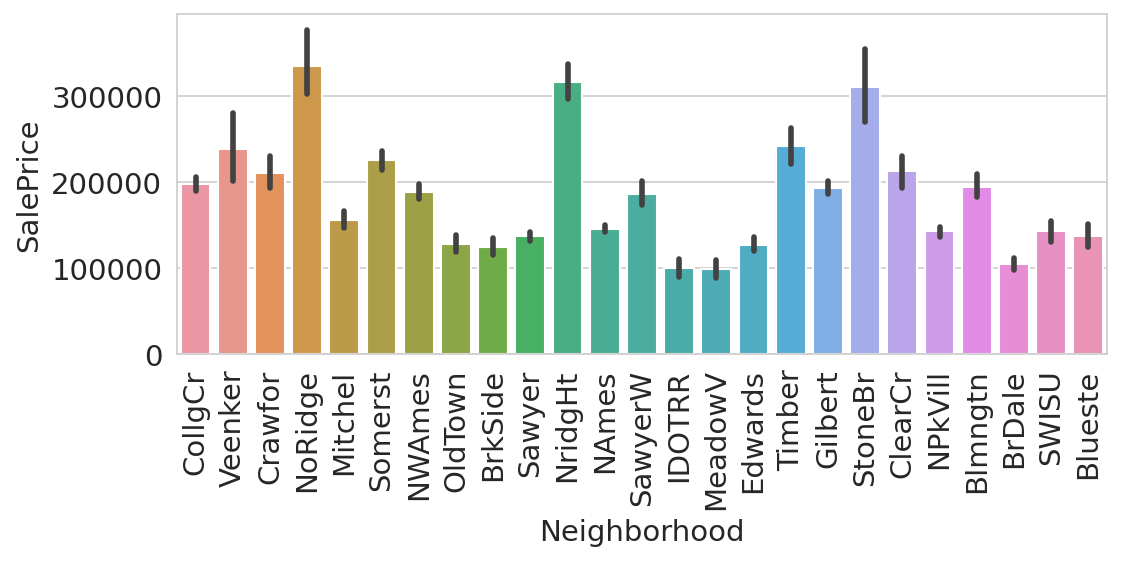

In [34]:
plt.figure(figsize=(8,3), dpi=150)
sns.barplot(data=df_location, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=90);

* Как видно, (NoRidge, NridgHt и StoneBr) считаются самыми дорогими районами

### 3.1.3 Строение жилья

In [35]:
df_building = train_data[['BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','SalePrice']]

In [36]:
df_building.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,1Fam,2Story,7,5,2003,2003,208500
1,1Fam,1Story,6,8,1976,1976,181500
2,1Fam,2Story,7,5,2001,2002,223500
3,1Fam,2Story,7,5,1915,1970,140000
4,1Fam,2Story,8,5,2000,2000,250000


<AxesSubplot:>

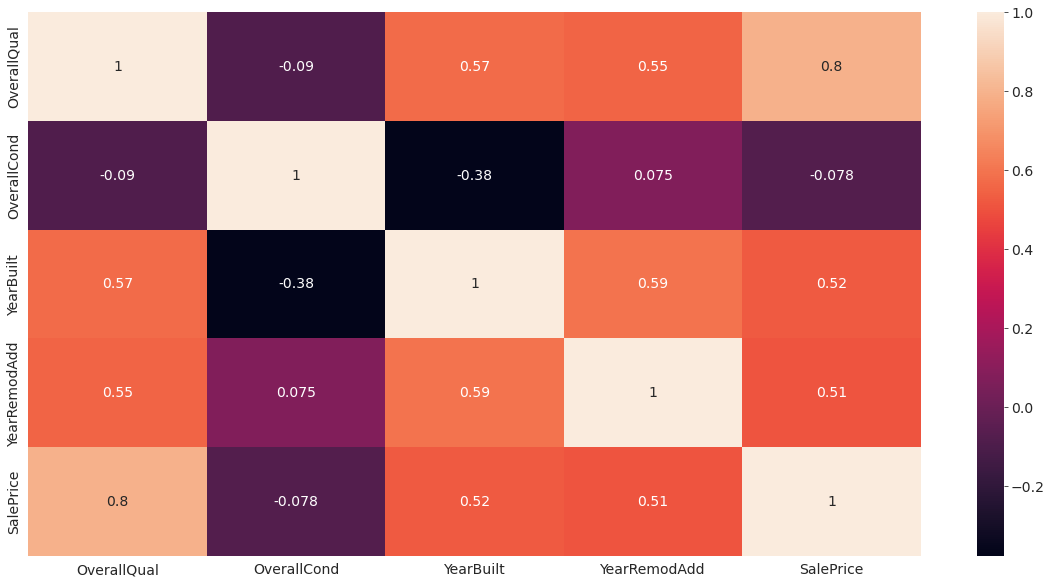

In [37]:
sns.heatmap(df_building.corr(), annot=True)

###### Проверим на пропуски

In [38]:
df_building.isna().sum()

BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

#### Из пункта 2.2 видно, что OverallQual и YearBuilt имеют самую высокую корреляцию с SalePrice

###### Построим график OverallQual и SalePrice

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

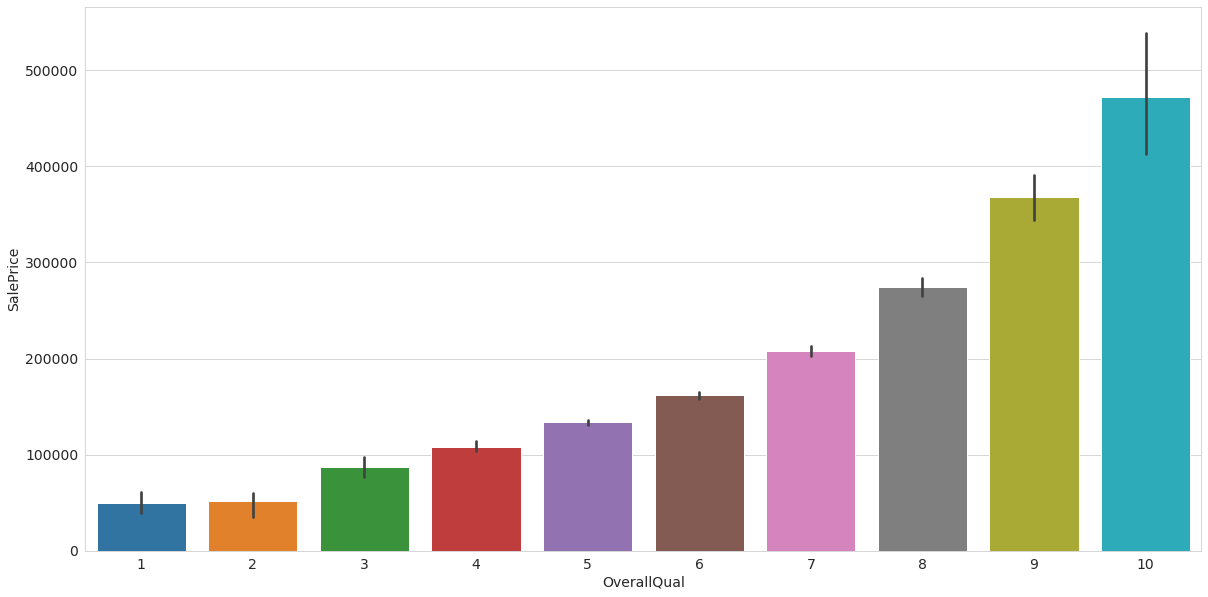

In [39]:
sns.barplot(data=df_building, x='OverallQual', y='SalePrice')

* Отлично видно, что качество и цена отлично будут коррелировать

###### Построим график YearBuilt и YearRemodAdd с SalePrice

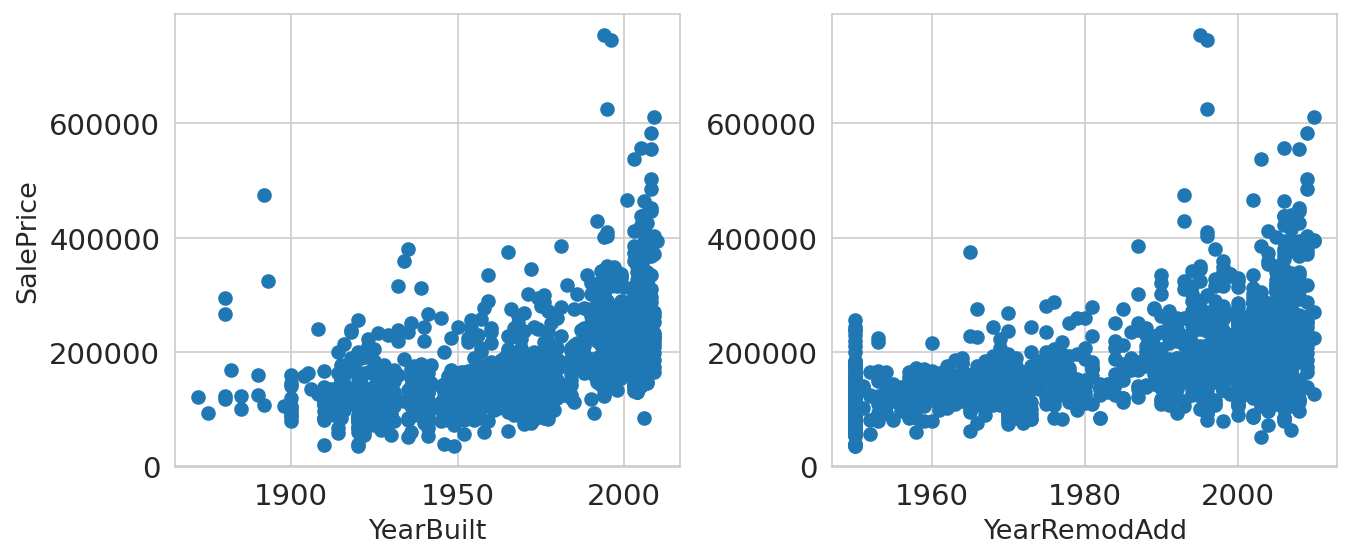

In [40]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4), dpi=150)
ax[0].scatter(x = df_building['YearBuilt'], y = df_building['SalePrice'])
ax[1].scatter(x = df_building['YearRemodAdd'], y = df_building['SalePrice'])
ax[0].set_ylabel('SalePrice', fontsize=13)
ax[0].set_xlabel('YearBuilt', fontsize=13)
ax[1].set_xlabel('YearRemodAdd', fontsize=13)
fig.subplots_adjust(wspace=0.3)
plt.show()

* Видно, что после 2000 года есть резкие скачки в цене

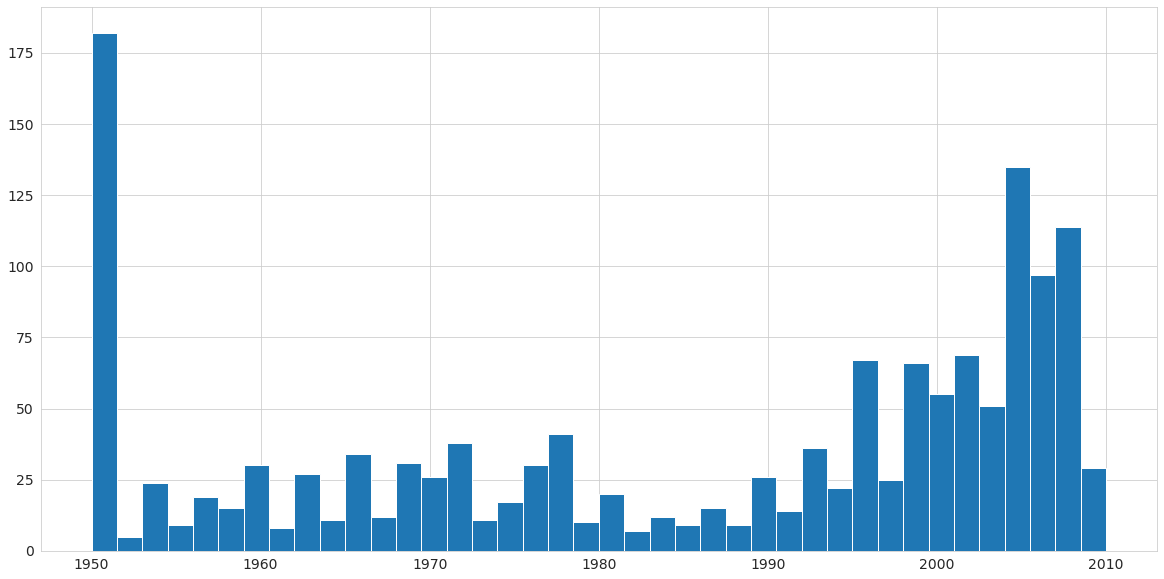

In [41]:
plt.hist(train_data["YearRemodAdd"].values, bins=40)
plt.show()

### 3.1.4 О конструкции

In [42]:
df_structure = train_data[['RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond',
                  'Foundation','SalePrice']]
df_structure.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,SalePrice
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,208500
1,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,181500
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,223500
3,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,140000
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,250000


###### Проверим пропуски

In [43]:
df_structure.isna().sum()

RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     8
MasVnrArea     8
ExterQual      0
ExterCond      0
Foundation     0
SalePrice      0
dtype: int64

###### Посмотрим на категориальные данные

In [44]:
cat_cols = df_structure[df_structure.columns[df_structure.dtypes=='object']]
cat_cols

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc
1,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock
2,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc
3,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil
4,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc
...,...,...,...,...,...,...,...,...
1455,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc
1456,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock
1457,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone
1458,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock


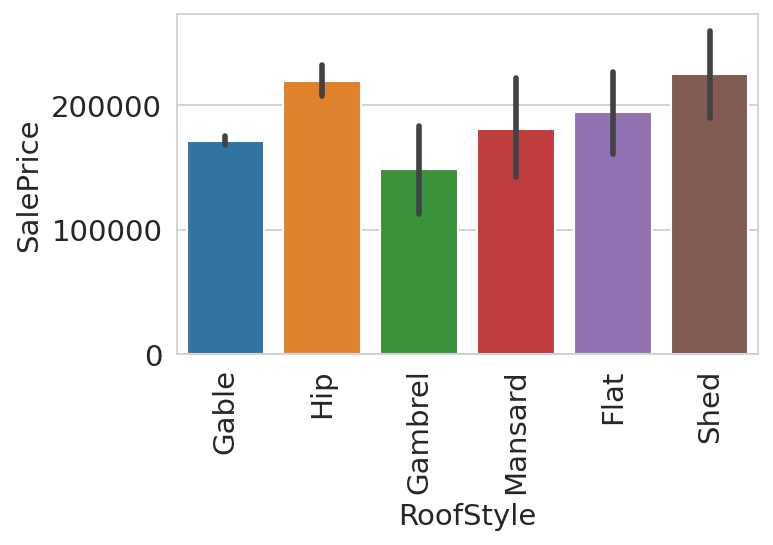

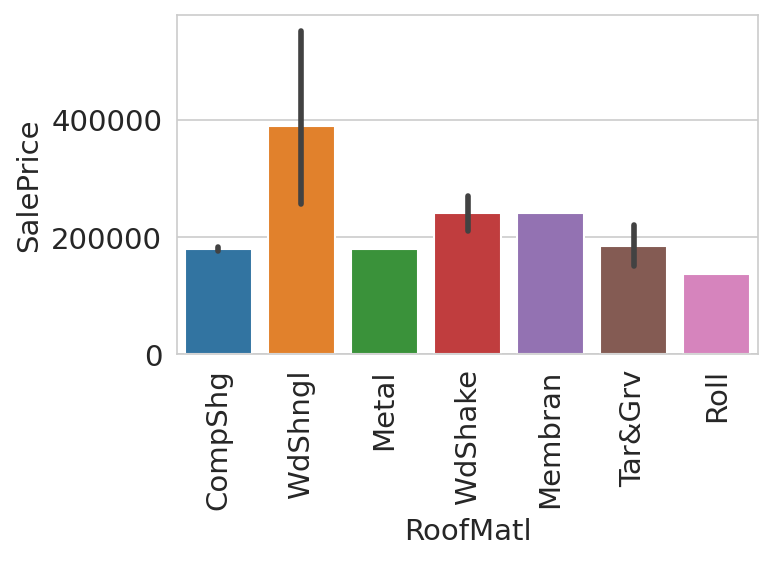

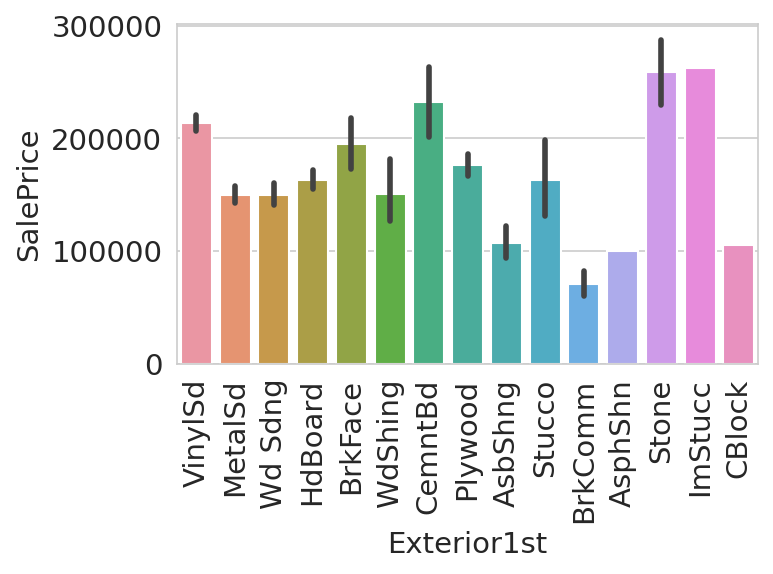

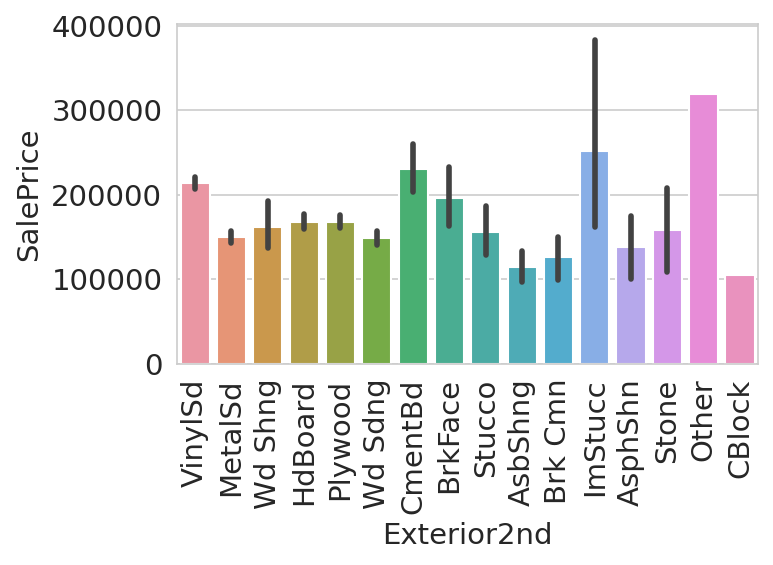

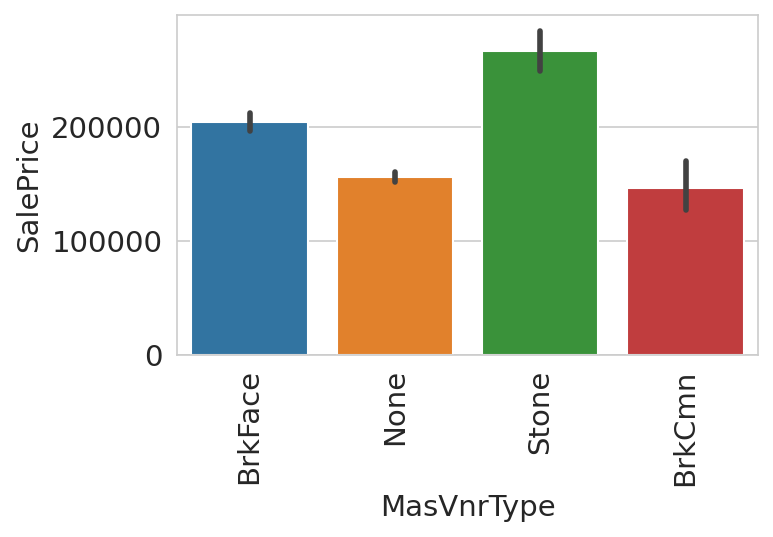

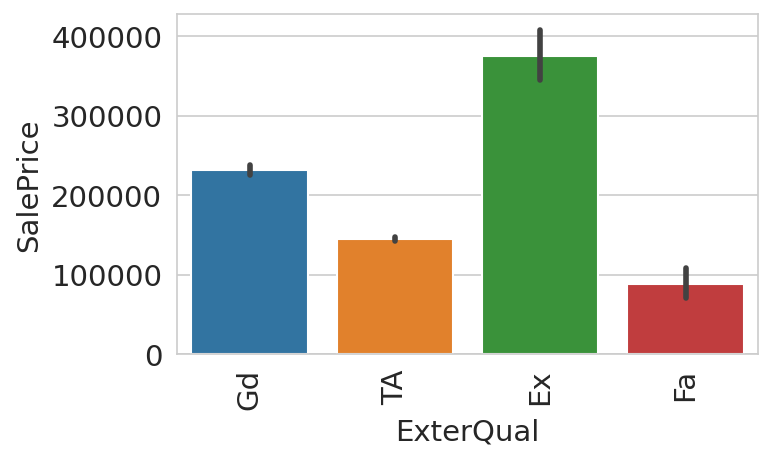

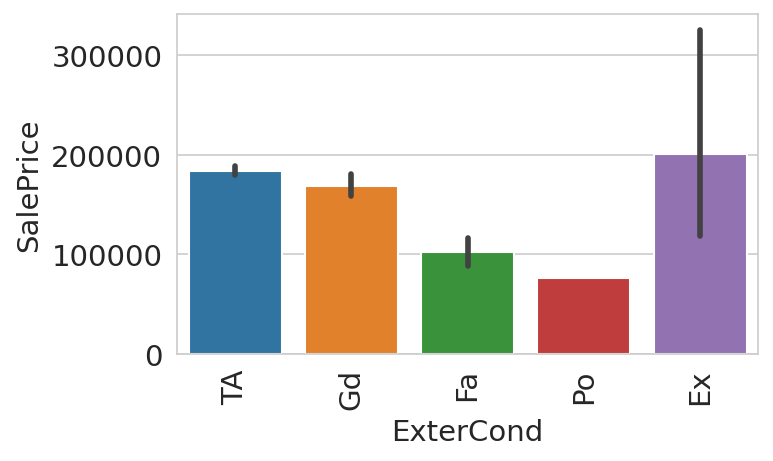

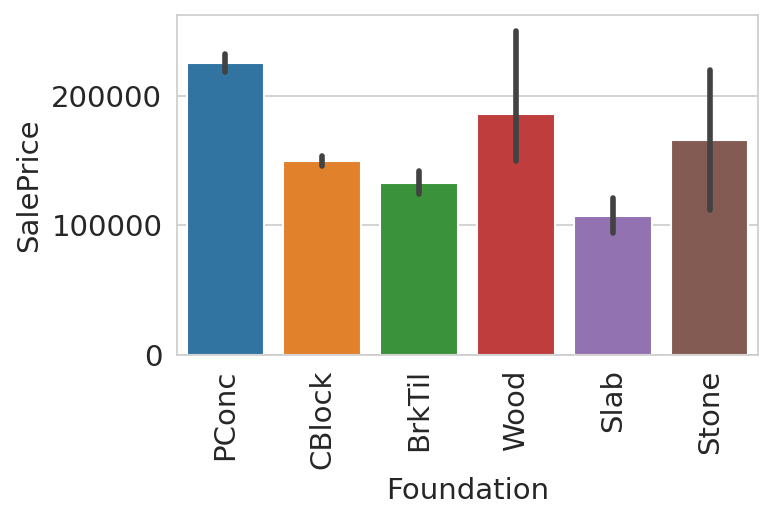

In [45]:
for col in cat_cols.columns:
    plt.figure(figsize=(5,3), dpi=150)
    sns.barplot(data=df_structure,x=col, y='SalePrice')
    plt.xticks(rotation=90)

<AxesSubplot:>

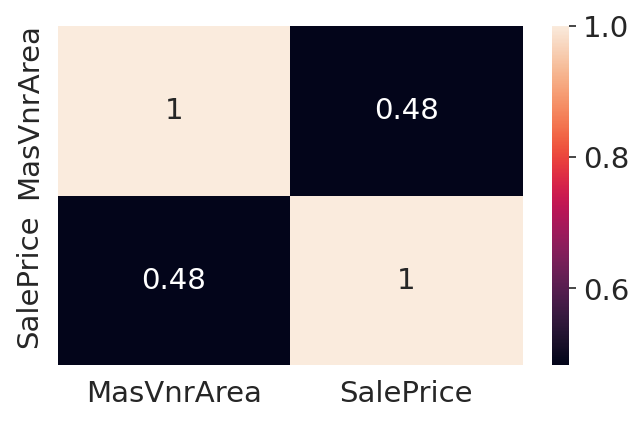

In [46]:
plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(df_structure.corr(), annot=True)

<Figure size 1050x600 with 0 Axes>

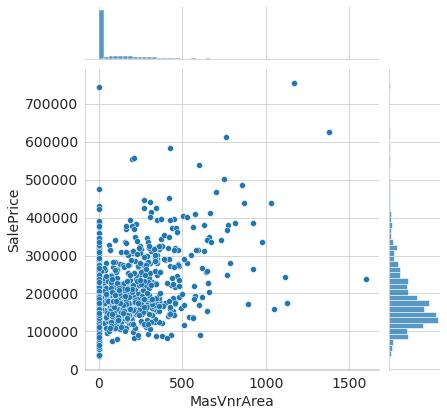

In [47]:
plt.figure(figsize=(7,4), dpi=150)
sns.jointplot(data=df_structure, x='MasVnrArea', y='SalePrice')

In [48]:
df_structure['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64

* 864 None значение - ужасно!)

### Заменим пропущенные данные

In [49]:
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0], inplace=True)
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0], inplace=True)

In [50]:
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace=True)
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].median(), inplace=True)

### 3.1.5 Подвал

In [51]:
df_basement = train_data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
                  'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','SalePrice']]
df_basement.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,SalePrice
0,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0,208500
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,1,181500
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0,223500
3,TA,Gd,No,ALQ,216,Unf,0,540,756,1,0,140000
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0,250000


###### Проверим пропуски

In [52]:
df_basement.isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
SalePrice        0
dtype: int64

<AxesSubplot:>

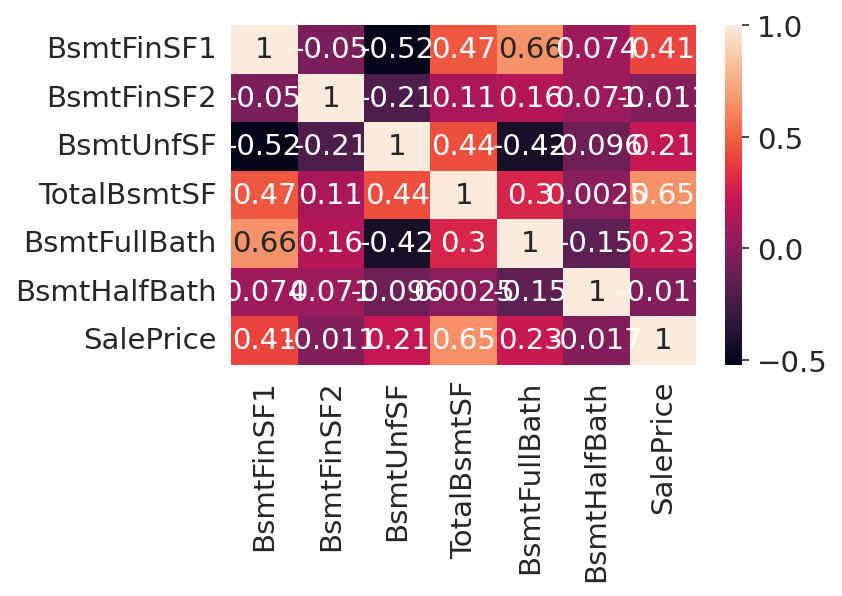

In [53]:
plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(df_basement.corr(), annot=True)

* Видно, что BsmtFinSF1 и TotalBsmtSf хорошо коррелируют с SalePrice

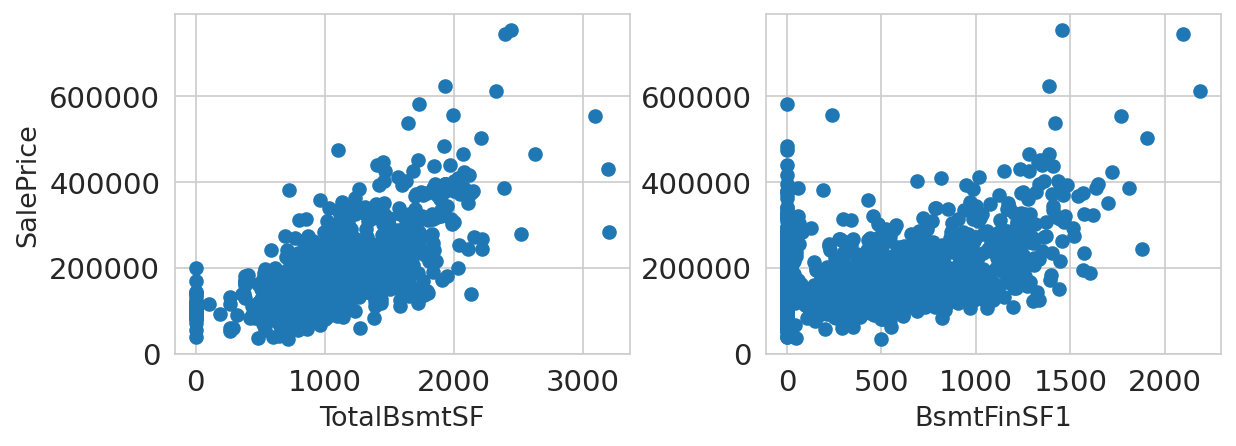

In [54]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(9,3), dpi=150)
ax[0].scatter(x = df_basement['TotalBsmtSF'], y = df_basement['SalePrice'])
ax[1].scatter(x = df_basement['BsmtFinSF1'], y = df_basement['SalePrice'])
ax[0].set_ylabel('SalePrice', fontsize=13)
ax[0].set_xlabel('TotalBsmtSF', fontsize=13)
ax[1].set_xlabel('BsmtFinSF1', fontsize=13)
fig.subplots_adjust(wspace=0.3)
plt.show()

#### В описание сказано, что на местах, где стоит Na означает, что этого просто нету, поэтому заменим Na на None

In [55]:
train_data['BsmtQual'].fillna('None', inplace=True)
train_data['BsmtCond'].fillna('None', inplace=True)
train_data['BsmtExposure'].fillna('None', inplace=True)
test_data['BsmtQual'].fillna('None', inplace=True)
test_data['BsmtCond'].fillna('None', inplace=True)
test_data['BsmtExposure'].fillna('None', inplace=True)

#### Удаляем ненужные фичи

In [56]:
train_data.drop(['BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtHalfBath'], axis=1, inplace=True)
test_data.drop(['BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtHalfBath'], axis=1, inplace=True)

### 3.1.6 Удобства

In [57]:
df_comfort = train_data[['Heating','HeatingQC','CentralAir','Electrical','Fireplaces','FireplaceQu','SalePrice']]
df_comfort.head()

,Heating,HeatingQC,CentralAir,Electrical,Fireplaces,FireplaceQu,SalePrice
0,GasA,Ex,Y,SBrkr,0,NaN,208500
1,GasA,Ex,Y,SBrkr,1,TA,181500
2,GasA,Ex,Y,SBrkr,1,TA,223500
3,GasA,Gd,Y,SBrkr,1,Gd,140000
4,GasA,Ex,Y,SBrkr,1,TA,250000


###### Проверим пропуски

In [58]:
df_comfort.isna().sum()

Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
Fireplaces       0
FireplaceQu    690
SalePrice        0
dtype: int64

##### Посмотрим на графики 

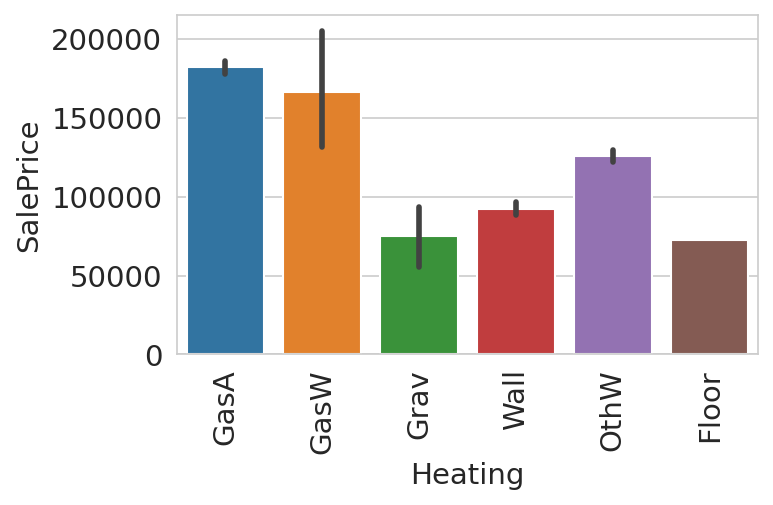

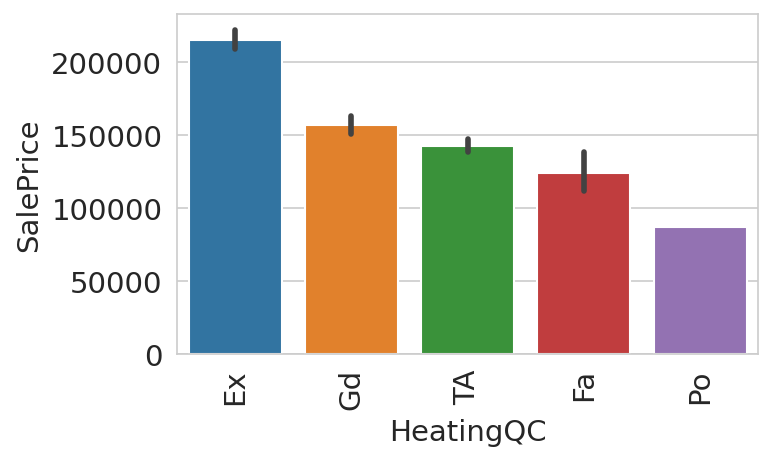

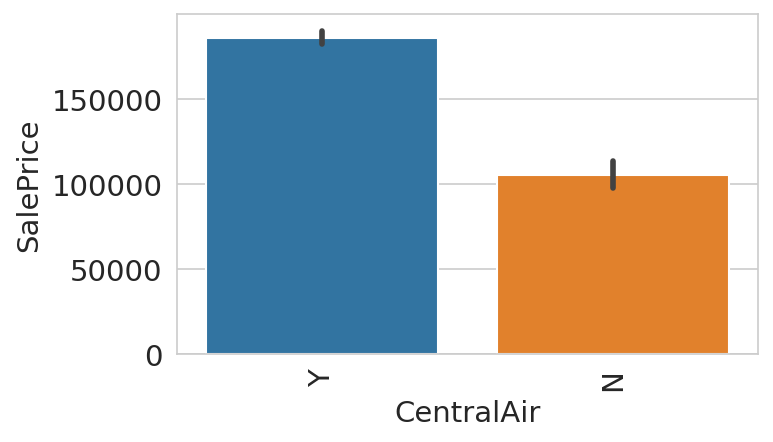

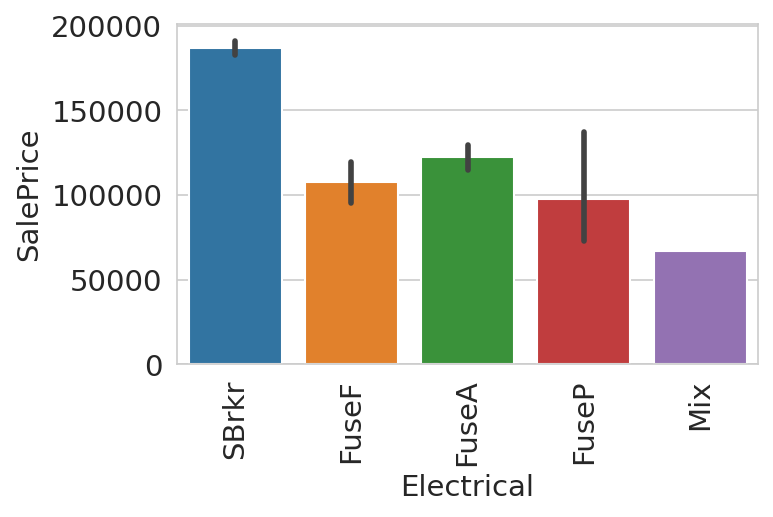

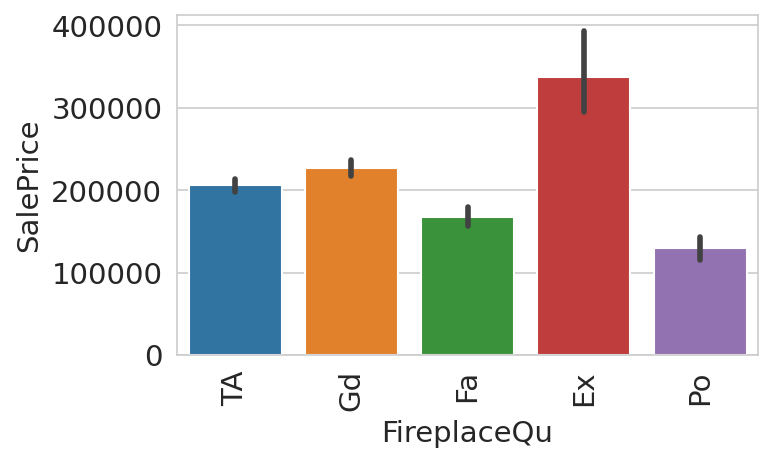

In [59]:
for col in df_comfort.drop(["SalePrice", "Fireplaces"], axis=1).columns:
    plt.figure(figsize=(5,3), dpi=150)
    sns.barplot(data=df_comfort,x=col, y='SalePrice')
    plt.xticks(rotation=90)

* Видно, что качество отопления и воздуха важные фичи

<AxesSubplot:>

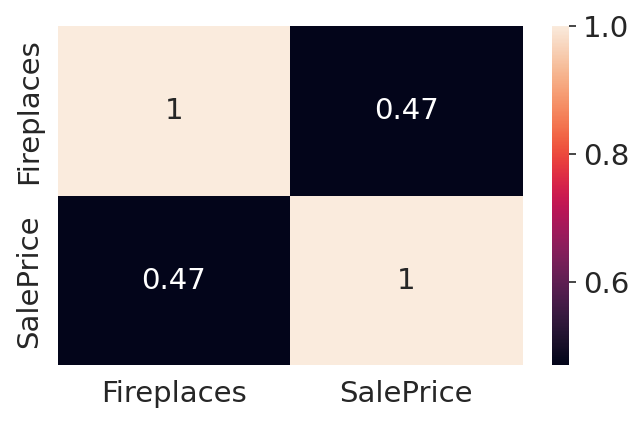

In [60]:
plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(df_comfort.corr(), annot=True)

In [61]:
train_data['FireplaceQu'].fillna('None', inplace=True)
test_data['FireplaceQu'].fillna('None', inplace=True)

In [62]:
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0], inplace=True)
test_data['Electrical'].fillna(test_data['Electrical'].mode()[0], inplace=True)

### 3.1.7 Жилое пространство

In [63]:
df_livspace = train_data[['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','KitchenQual',
                  'TotRmsAbvGrd','Functional','SalePrice']]
df_livspace.head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,SalePrice
0,856,854,0,1710,2,1,Gd,8,Typ,208500
1,1262,0,0,1262,2,0,TA,6,Typ,181500
2,920,866,0,1786,2,1,Gd,6,Typ,223500
3,961,756,0,1717,1,0,Gd,7,Typ,140000
4,1145,1053,0,2198,2,1,Gd,9,Typ,250000


In [64]:
df_livspace.isna().sum()

1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
FullBath        0
HalfBath        0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
SalePrice       0
dtype: int64

<AxesSubplot:>

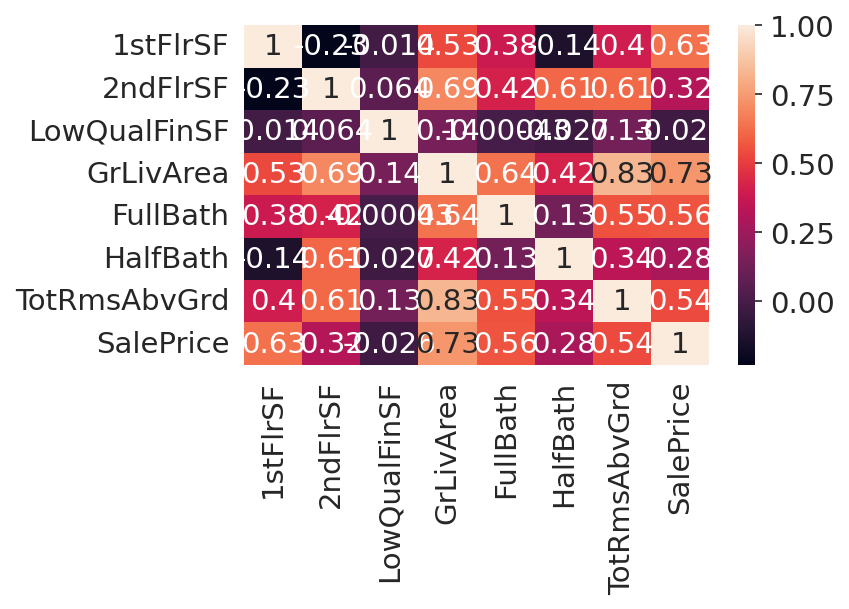

In [65]:
plt.figure(figsize=(5,3), dpi=150)
sns.heatmap(df_livspace.corr(), annot=True)

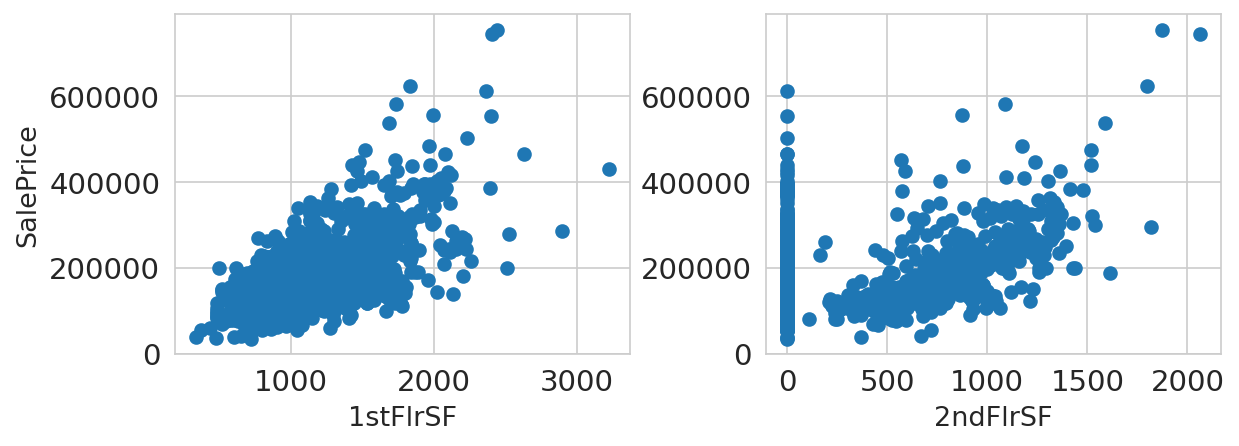

In [66]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(9,3), dpi=150)
ax[0].scatter(x = df_livspace['1stFlrSF'], y = df_livspace['SalePrice'])
ax[1].scatter(x = df_livspace['2ndFlrSF'], y = df_livspace['SalePrice'])
ax[0].set_ylabel('SalePrice', fontsize=13)
ax[0].set_xlabel('1stFlrSF', fontsize=13)
ax[1].set_xlabel('2ndFlrSF', fontsize=13)
fig.subplots_adjust(wspace=0.3)
plt.show()

* большинство значение равно нулю, поэтому следуют дропнуть LowQualFinSF как общую для двух этажей

In [67]:
train_data.drop('LowQualFinSF', axis=1, inplace=True)
test_data.drop('LowQualFinSF', axis=1, inplace=True)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

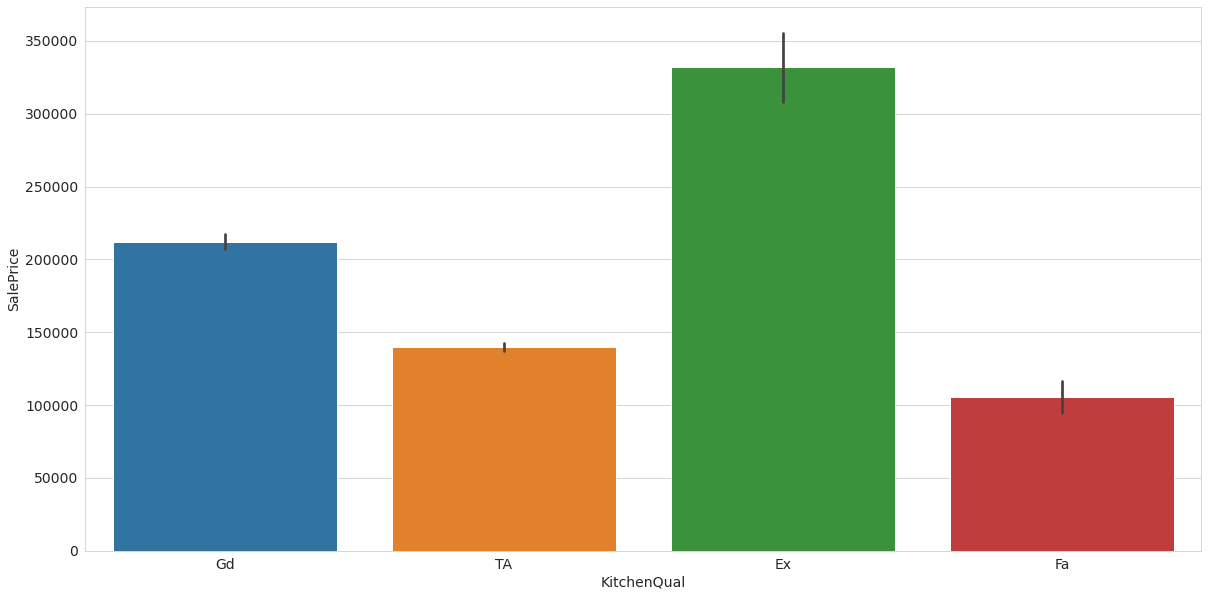

In [68]:
sns.barplot(data=df_livspace, x='KitchenQual', y='SalePrice')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

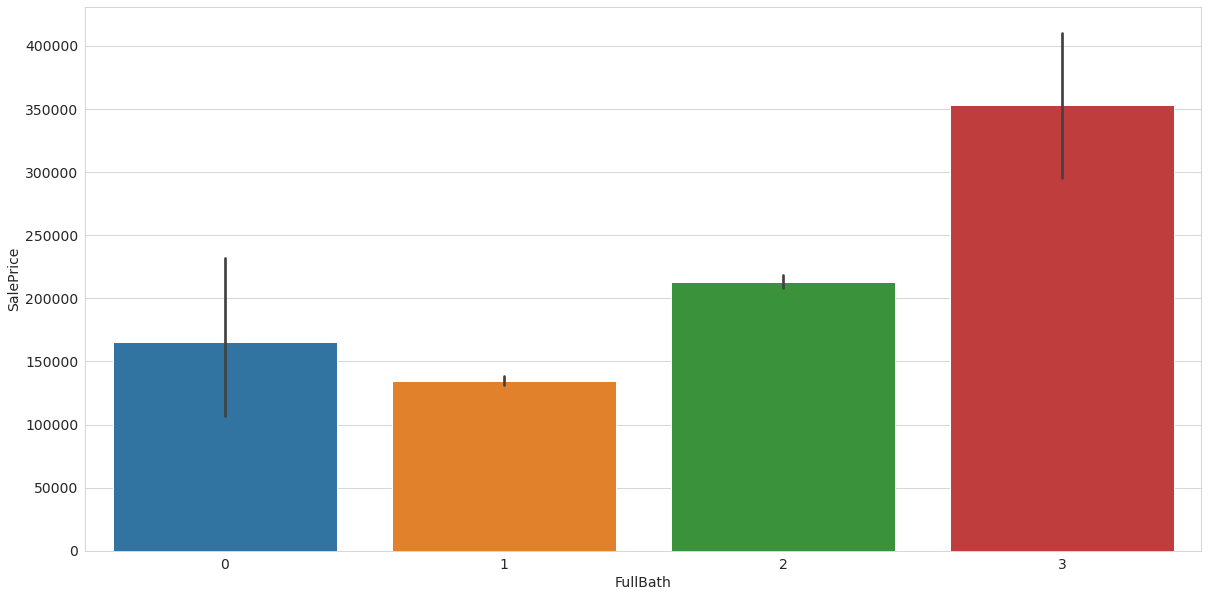

In [69]:
sns.barplot(data=df_livspace, x='FullBath', y='SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

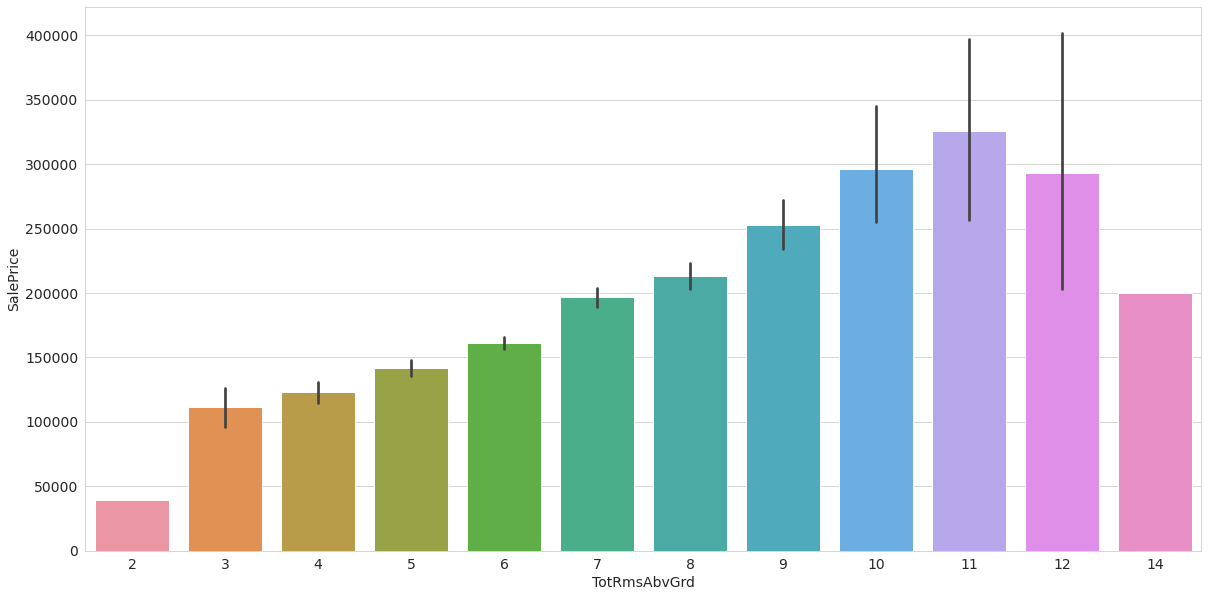

In [70]:
sns.barplot(data=df_livspace, x="TotRmsAbvGrd", y="SalePrice")

* Удаляем HalfBath, так как он имеют слабую корреляцию с SalePrice и у нас есть TotalBath

In [71]:
train_data.drop('HalfBath', axis=1, inplace=True)
test_data.drop('HalfBath', axis=1, inplace=True)

### 3.1.8 Внешние удобства

In [72]:
df_exterior = train_data[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond',
                 'PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                 'PoolQC','Fence','MiscFeature','SalePrice']]
df_exterior.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SalePrice
0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,208500
1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,181500
2,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,223500
3,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,140000
4,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,250000


In [73]:
df_exterior.isna().sum()

GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1452
Fence            1177
MiscFeature      1404
SalePrice           0
dtype: int64

<AxesSubplot:>

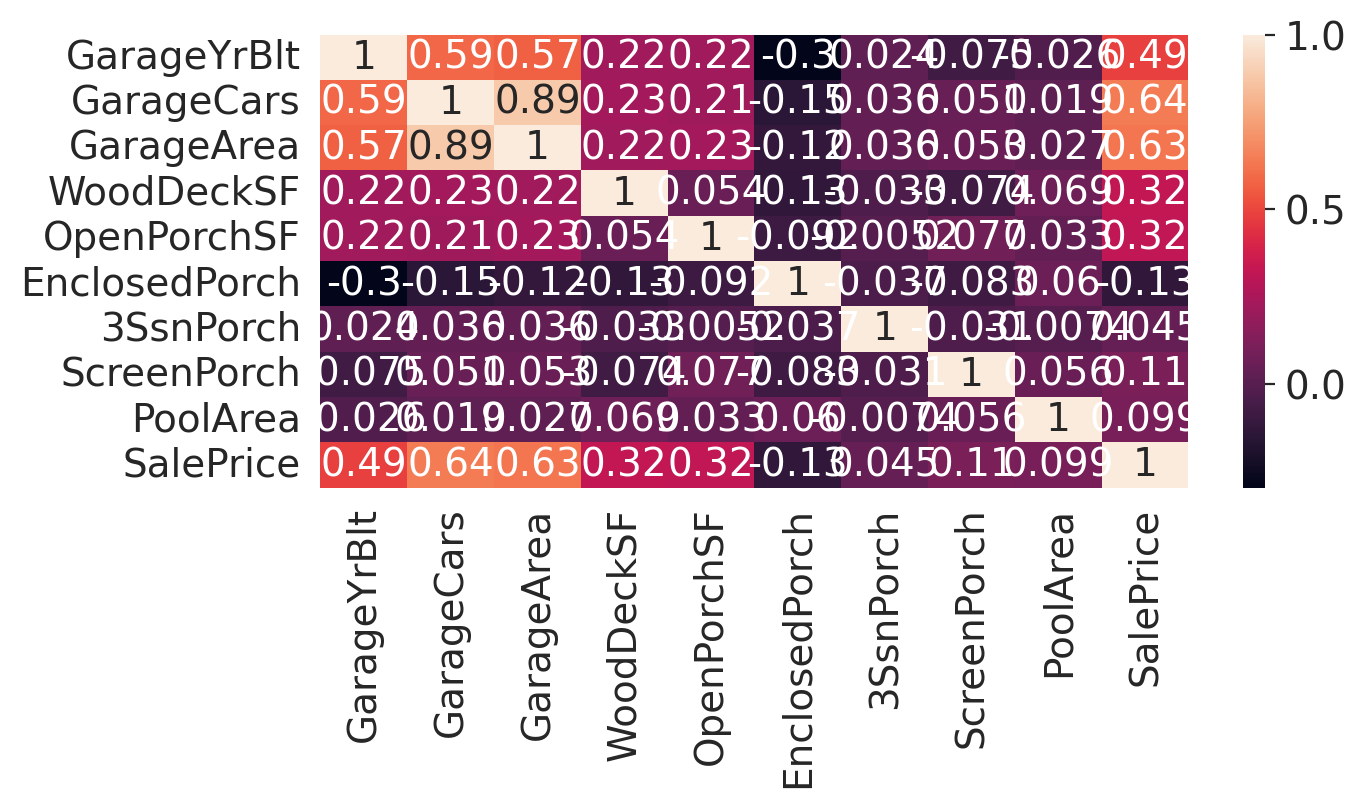

In [74]:
plt.figure(figsize=(7,3), dpi=200)
sns.heatmap(df_exterior.corr(), annot=True)

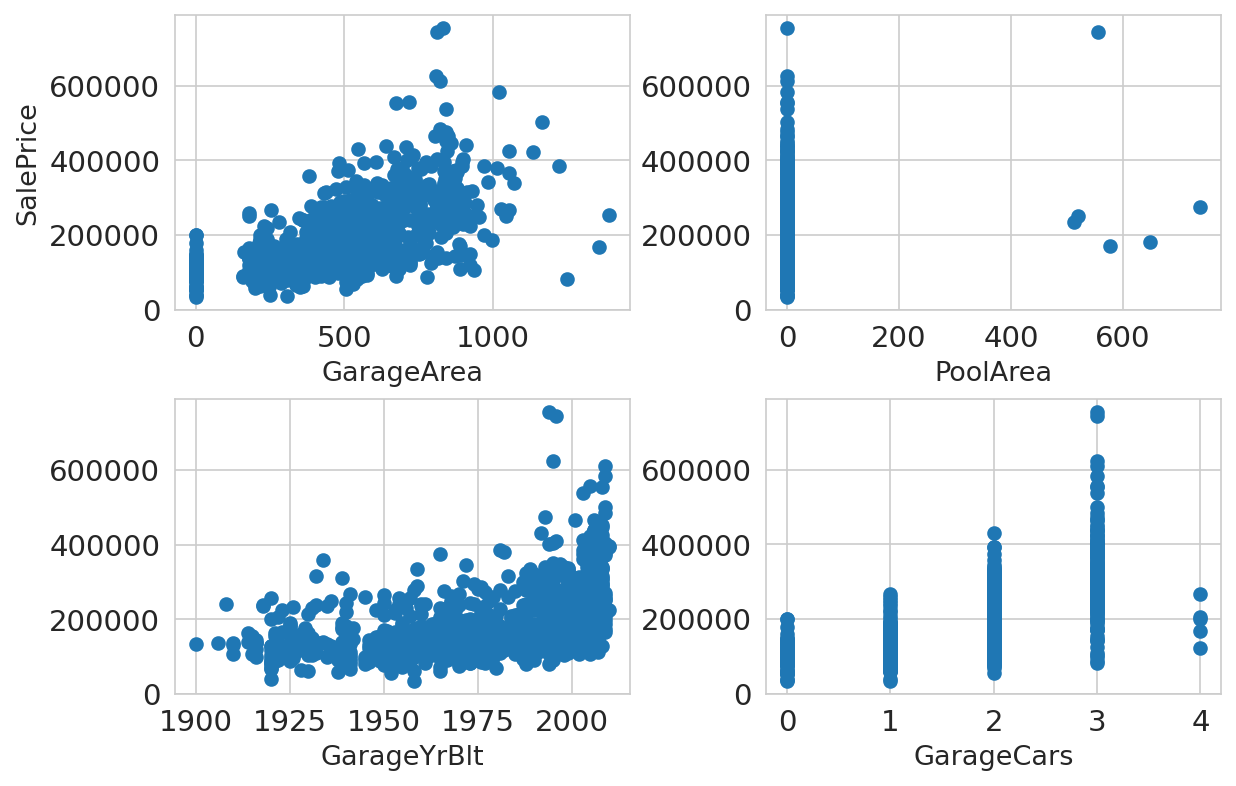

In [75]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(9,6), dpi=150)
ax[0][0].scatter(x = df_exterior['GarageArea'], y = df_exterior['SalePrice'])
ax[0][1].scatter(x = df_exterior['PoolArea'], y = df_exterior['SalePrice'])
ax[1][0].scatter(x = df_exterior['GarageYrBlt'], y = df_exterior['SalePrice'])
ax[1][1].scatter(x = df_exterior['GarageCars'], y = df_exterior['SalePrice'])
ax[0][0].set_ylabel('SalePrice', fontsize=13)
ax[0][0].set_xlabel('GarageArea', fontsize=13)
ax[0][1].set_xlabel('PoolArea', fontsize=13)
ax[1][0].set_xlabel('GarageYrBlt', fontsize=13)
ax[1][1].set_xlabel('GarageCars', fontsize=13)
fig.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

In [76]:
train_data.drop(['MiscFeature','Fence','PoolArea','PoolQC','GarageYrBlt'], axis=1,inplace=True)
test_data.drop(['MiscFeature','Fence','PoolArea','PoolQC','GarageYrBlt'], axis=1,inplace=True)

In [77]:
train_data['GarageType'].fillna('None',inplace=True)
train_data['GarageFinish'].fillna('None',inplace=True)
train_data['GarageQual'].fillna('None',inplace=True)
train_data['GarageCond'].fillna('None',inplace=True)
test_data['GarageType'].fillna('None',inplace=True)
test_data['GarageFinish'].fillna('None',inplace=True)
test_data['GarageQual'].fillna('None',inplace=True)
test_data['GarageCond'].fillna('None',inplace=True)

In [78]:
Id = test_data["Id"]
train_data.drop(['MiscVal','MoSold','YrSold','SaleType','Id'], axis=1, inplace=True)
test_data.drop(['MiscVal','MoSold','YrSold','SaleType','Id'], axis=1, inplace=True)

In [79]:
cat_columns = train_data.select_dtypes(include='object').columns
for i in cat_columns:
    label = LabelEncoder()
    label.fit(train_data[i].values)
    train_data[i] = label.transform(train_data[i].values)

In [80]:
cat_column = test_data.select_dtypes(include='object').columns
for i in cat_column:
    label = LabelEncoder()
    label.fit(test_data[i].values)
    test_data[i] = label.transform(test_data[i].values)

In [81]:
test_data["BsmtFinSF1"].fillna(test_data["BsmtFinSF1"].median(), inplace=True)
test_data["BsmtUnfSF"].fillna(test_data["BsmtUnfSF"].median(), inplace=True)
test_data["BsmtFullBath"].fillna(test_data["BsmtFullBath"].median(), inplace=True)
test_data["GarageCars"].fillna(test_data["GarageCars"].median(), inplace=True)
test_data["GarageArea"].fillna(test_data["GarageArea"].median(), inplace=True)
test_data["BsmtFullBath"].fillna(test_data["BsmtFullBath"].mode()[0], inplace=True)
test_data["TotalBsmtSF"].fillna(test_data["TotalBsmtSF"].median(), inplace=True)

In [82]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleCondition
0,20,2,80.0,11622,1,3,3,0,0,12,...,730.0,4,5,2,140,0,0,0,120,4
1,20,3,81.0,14267,1,0,3,0,0,12,...,312.0,4,5,2,393,36,0,0,0,4
2,60,3,74.0,13830,1,0,3,0,0,8,...,482.0,4,5,2,212,34,0,0,0,4
3,60,3,78.0,9978,1,0,3,0,0,8,...,470.0,4,5,2,360,36,0,0,0,4
4,120,3,43.0,5005,1,0,1,0,0,22,...,506.0,4,5,2,0,82,0,0,144,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,3,3,0,0,10,...,0.0,2,3,2,0,0,0,0,0,4
1455,160,4,21.0,1894,1,3,3,0,0,10,...,286.0,4,5,2,0,24,0,0,0,0
1456,20,3,160.0,20000,1,3,3,0,0,11,...,576.0,4,5,2,474,0,0,0,0,0
1457,85,3,62.0,10441,1,3,3,0,0,11,...,0.0,2,3,2,80,32,0,0,0,4


In [83]:
test_data.isna().sum()[:40]

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
dtype: int64

In [84]:
train_data["TotalBsmtSF"]

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1458, dtype: int64

In [85]:
a=train_data.corr()["SalePrice"]

In [86]:
a[a > 0.3]

LotFrontage     0.352688
OverallQual     0.795774
YearBuilt       0.523608
YearRemodAdd    0.507717
MasVnrArea      0.477810
Foundation      0.382795
BsmtFinSF1      0.409384
TotalBsmtSF     0.651153
1stFlrSF        0.631530
2ndFlrSF        0.320532
GrLivArea       0.734968
FullBath        0.562165
TotRmsAbvGrd    0.537769
Fireplaces      0.469862
GarageCars      0.641047
GarageArea      0.629217
WoodDeckSF      0.324758
OpenPorchSF     0.321142
SalePrice       1.000000
Name: SalePrice, dtype: float64

### Model

In [87]:
y = train_data['SalePrice'].values
X = train_data.drop('SalePrice',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
print("mean_squared_error : ",mean_squared_error(y_test, predictions))
print("r2_score : ", r2_score(y_test, predictions)) 
print("mean_absolute_error : ", mean_absolute_error(y_test, predictions))

mean_squared_error :  622847304.2443335
r2_score :  0.8983299136542356
mean_absolute_error :  16605.22106849315


In [89]:
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
predictions1 = regr.predict(X_test)
predictions2= regr.predict(X_train)
print("mean_squared_error : ",mean_squared_error(y_test, predictions1))
print("r2_score : ", r2_score(y_test, predictions1)) 
print("mean_absolute_error : ", mean_absolute_error(y_test, predictions1))
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_test, predictions1)))
print("mean_squared_error : ",mean_squared_error(y_train, predictions2))
print("r2_score : ", r2_score(y_train, predictions2)) 
print("mean_absolute_error : ", mean_absolute_error(y_train, predictions2))
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_train, predictions2)))

mean_squared_error :  622847304.2443335
r2_score :  0.8983299136542356
mean_absolute_error :  16605.22106849315
Root mean_squared_error :  24956.908948111613
mean_squared_error :  106316212.2028225
r2_score :  0.9833306677296461
mean_absolute_error :  6414.203129002745
Root mean_squared_error :  10310.975327427688


In [90]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
print("mean_squared_error : ",mean_squared_error(y_test, predictions))
print("r2_score : ", r2_score(y_test, predictions)) 
print("mean_absolute_error : ", mean_absolute_error(y_test, predictions))

mean_squared_error :  466056933.76968557
r2_score :  0.9239234907568644
mean_absolute_error :  15134.017206734985


In [140]:
gbr = GradientBoostingRegressor(random_state=12, max_depth=4, n_estimators=95, learning_rate=0.075,
                                min_samples_leaf=2, max_features=20)
gbr.fit(X, y)
predictions = gbr.predict(X)
print("mean_squared_error : ",mean_squared_error(y, predictions))
print("r2_score : ", r2_score(y, predictions)) 
print("mean_absolute_error : ", mean_absolute_error(y, predictions))
predictions = gbr.predict(X_test)
print("mean_squared_error : ",mean_squared_error(y_test, predictions))
print("r2_score : ", r2_score(y_test, predictions)) 
print("mean_absolute_error : ", mean_absolute_error(y_test, predictions))

mean_squared_error :  168547319.46104065
r2_score :  0.9733105520537424
mean_absolute_error :  9447.39517047837
mean_squared_error :  154478405.38656604
r2_score :  0.9747838150583903
mean_absolute_error :  9537.83001305565


In [124]:
gbr = GradientBoostingRegressor(random_state=12, max_depth=4, n_estimators=95, learning_rate=0.075,
                                min_samples_leaf=2, max_features=20)
gbr.fit(X_train, y_train)
predictions1 = gbr.predict(X_test)
predictions2= gbr.predict(X_train)
print("mean_squared_error : ",mean_squared_error(y_test, predictions1))
print("r2_score : ", r2_score(y_test, predictions1)) 
print("mean_absolute_error : ", mean_absolute_error(y_test, predictions1))
print("mean_squared_error : ",mean_squared_error(y_train, predictions2))
print("r2_score : ", r2_score(y_train, predictions2)) 
print("mean_absolute_error : ", mean_absolute_error(y_train, predictions2))

mean_squared_error :  425719725.71204317
r2_score :  0.9305079094389733
mean_absolute_error :  14890.310519778595
mean_squared_error :  136830984.5201695
r2_score :  0.9785462527437014
mean_absolute_error :  8626.09573705567


y_pred = gbr.predict(test_data)

In [131]:
# params = dict(max_depth = range(2, 5),
#                      min_samples_split = range(2, 5),
#                      min_samples_leaf = range(2, 5),
#                      n_estimators = range(10, 100, 5))
params = dict(max_features=range(5, 30))
gbr = GradientBoostingRegressor(random_state=12, max_depth=4, n_estimators=95, learning_rate=0.075,
                                min_samples_leaf=2)

In [132]:
forest_cv = GridSearchCV(estimator=gbr, param_grid=params, cv=5, n_jobs=-1)
forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.075,
                                                 max_depth=4,
                                                 min_samples_leaf=2,
                                                 n_estimators=95,
                                                 random_state=12),
             n_jobs=-1, param_grid={'max_features': range(5, 30)})

In [133]:
predictions1 = gbr.predict(X_test)
predictions2= gbr.predict(X_train)
print("mean_squared_error : ",mean_squared_error(y_test, predictions1))
print("r2_score : ", r2_score(y_test, predictions1)) 
print("mean_absolute_error : ", mean_absolute_error(y_test, predictions1))
print("mean_squared_error : ",mean_squared_error(y_train, predictions2))
print("r2_score : ", r2_score(y_train, predictions2)) 
print("mean_absolute_error : ", mean_absolute_error(y_train, predictions2))

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [134]:
forest_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.075, max_depth=4, max_features=10,
                          min_samples_leaf=2, n_estimators=95, random_state=12)

In [141]:
y_pred = gbr.predict(test_data)

In [142]:
Regresult = pd.DataFrame(y_pred, columns=["SalePrice"])
test_t = pd.DataFrame(Id)
Regresult

,SalePrice
0,129751.491864
1,157711.358514
2,173625.881679
3,181923.813026
4,198405.806303
...,...
1454,79997.916867
1455,81127.704109
1456,157274.567780
1457,119759.698647


In [143]:
my_submission = pd.concat([test_t, Regresult], axis=1)
my_submission.to_csv("KaggleSubV.csv", index=False)

my_submission

In [144]:
my_submission

,Id,SalePrice
0,1461,129751.491864
1,1462,157711.358514
2,1463,173625.881679
3,1464,181923.813026
4,1465,198405.806303
...,...,...
1454,2915,79997.916867
1455,2916,81127.704109
1456,2917,157274.567780
1457,2918,119759.698647


* Опробовать настроить гиперпараметры модели
* Удалить фичи которые имеют 00000000000000
* Оставить фичи которые показаны в feature_importances_ (20-30)
* PCA 
* Комбинации всего

In [ ]:
y = train_data['SalePrice'].values
X = train_data.drop('SalePrice',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(a, y, test_size=0.25, random_state=42)

In [ ]:
plt.scatter(a[0], a[1])

In [ ]:
plt.scatter(a[0], a[2])

In [ ]:
plt.scatter(a[0], a[3])

In [ ]:
plt.scatter(a[1], a[2])

In [ ]:
plt.scatter(a[1], a[3])

In [ ]:
plt.scatter(a[2], a[3])

### PCA

In [ ]:
X_pca = train_data.drop("SalePrice", axis=1)

In [ ]:
pca = PCA(n_components=4)

In [ ]:
model = pca.fit(X_pca)

In [ ]:
train_trans = model.transform(X_pca)

In [ ]:
test_trans = model.transform(test_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_trans, y, test_size=0.25, random_state=42)

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
predictions1 = gbr.predict(X_test)
predictions2= gbr.predict(X_train)
print("mean_squared_error : ",mean_squared_error(y_test, predictions1))
print("r2_score : ", r2_score(y_test, predictions1)) 
print("mean_absolute_error : ", mean_absolute_error(y_test, predictions1))
print("mean_squared_error : ",mean_squared_error(y_train, predictions2))
print("r2_score : ", r2_score(y_train, predictions2)) 
print("mean_absolute_error : ", mean_absolute_error(y_train, predictions2))

* Взять 20-30 важных фичей, а к остальным применить pca и свести до 1-4 фичей.
